##### Imports

In [1]:
from rich.console import Console

from ariel_experiments.gui_vis.view_mujoco import view
from ariel_experiments.gui_vis.visualize_tree import (
    visualize_tree_from_graph,
)
from ariel_experiments.utils.initialize import generate_random_individual
from ariel_experiments.characterize.canonical.core.toolkit import (
    CanonicalToolKit as ctk,
)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
console = Console()
console.is_jupyter = False  # makes the print output from rich more compact
%matplotlib inline

##### Factory tutorial

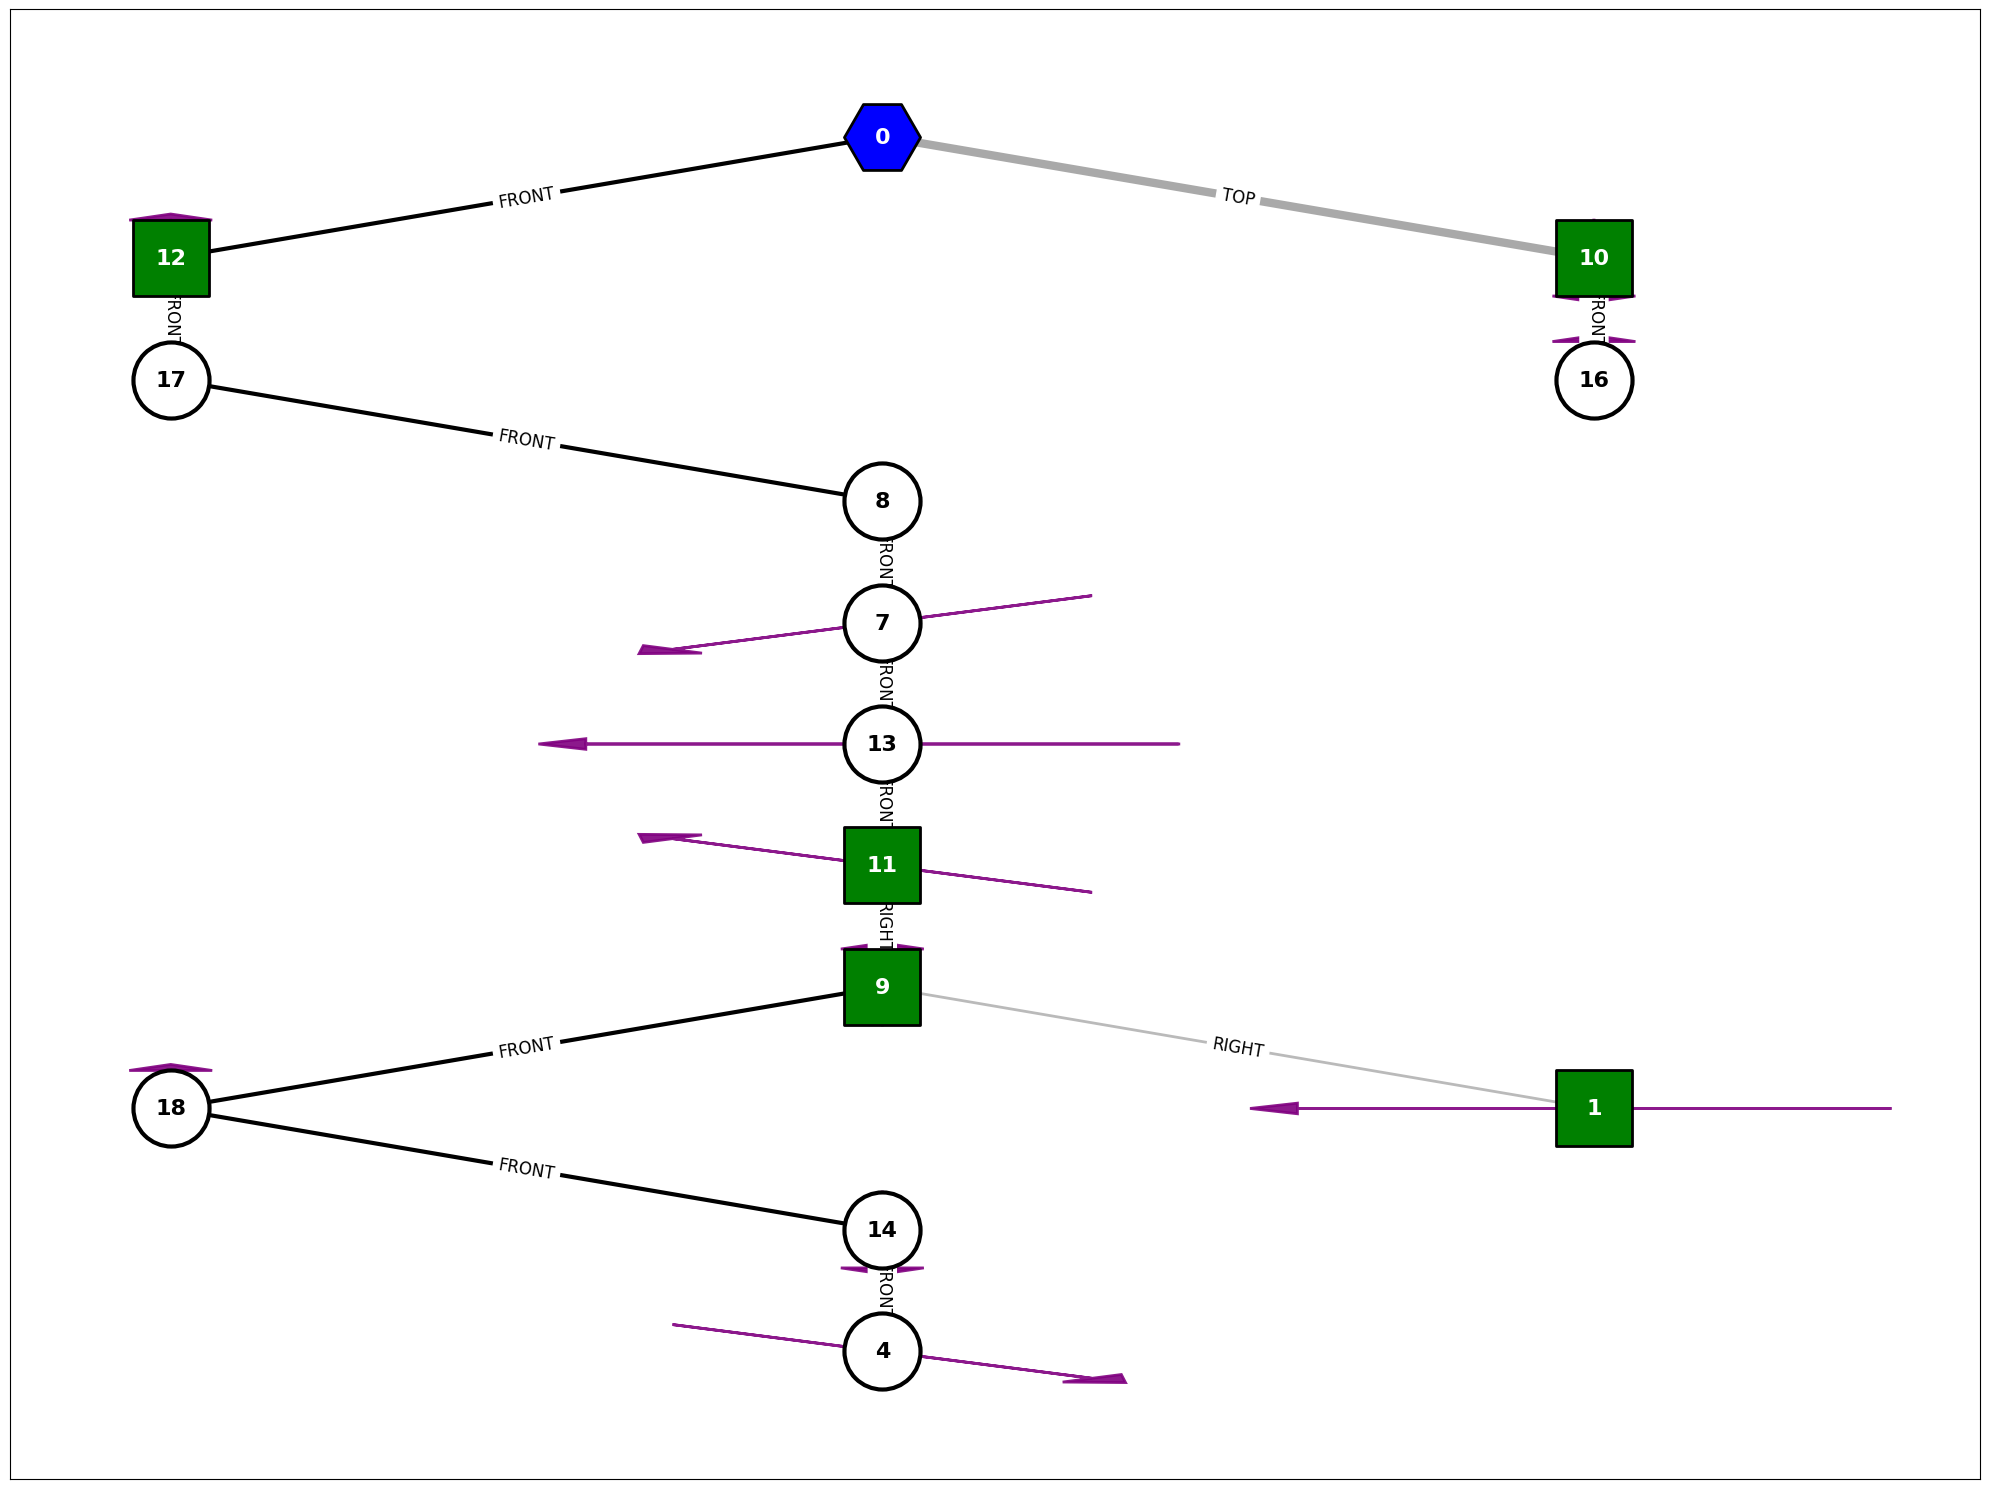

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen
Dropped Escape call with ulEscapeCode : 0x03007703


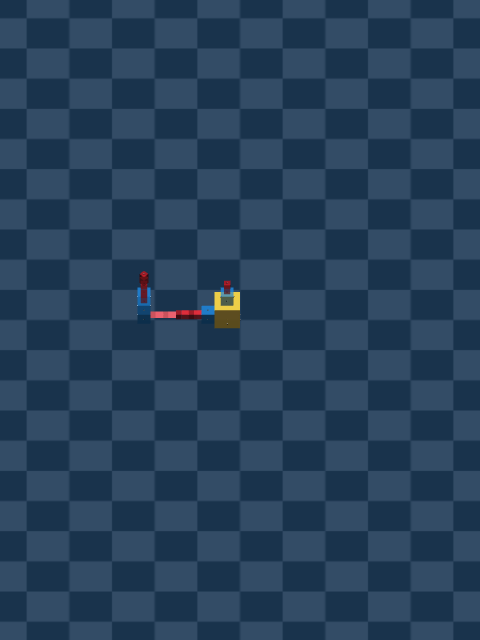

In [3]:
individual = generate_random_individual()

visualize_tree_from_graph(individual)

view(individual)

toggle auto_id to get the same ids as the graph:

In [4]:
auto_id = True

tree = ctk.from_graph(individual, auto_id=auto_id)

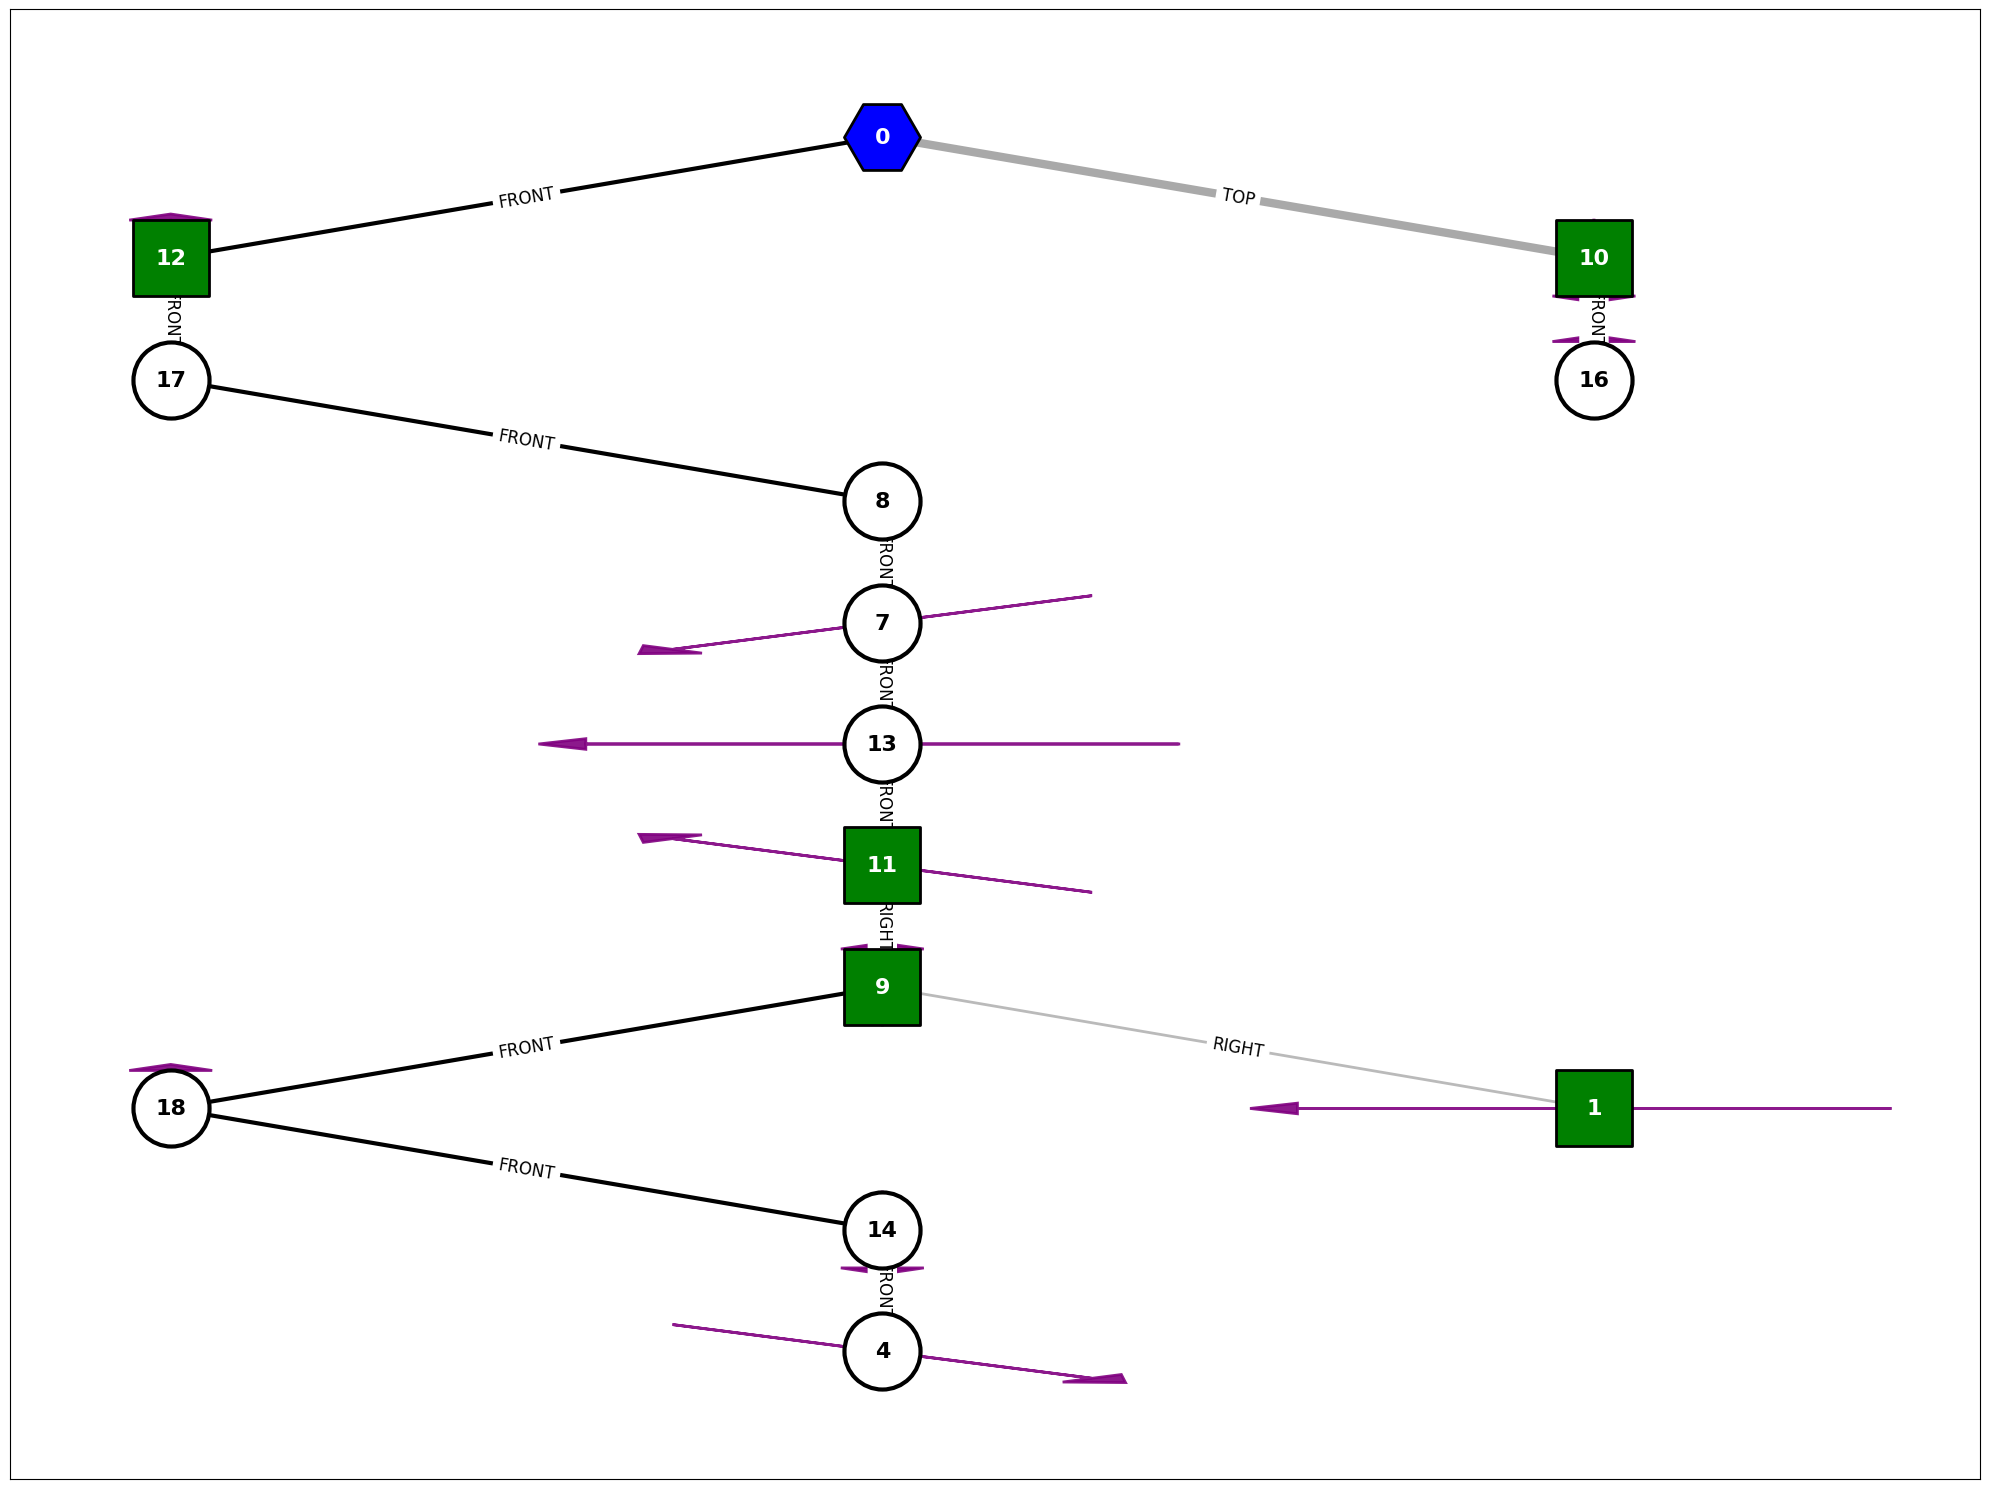

In [5]:
visualize_tree_from_graph(ctk.to_graph(tree))

canonicalize the tree:

In [6]:
# automatically the 'limbs' will get repositioned to follow a 'canonicalized order',
# this may result in the robot being rotated when viewing the mujoco image

# you can turn this off with:

auto_adjust_children = True

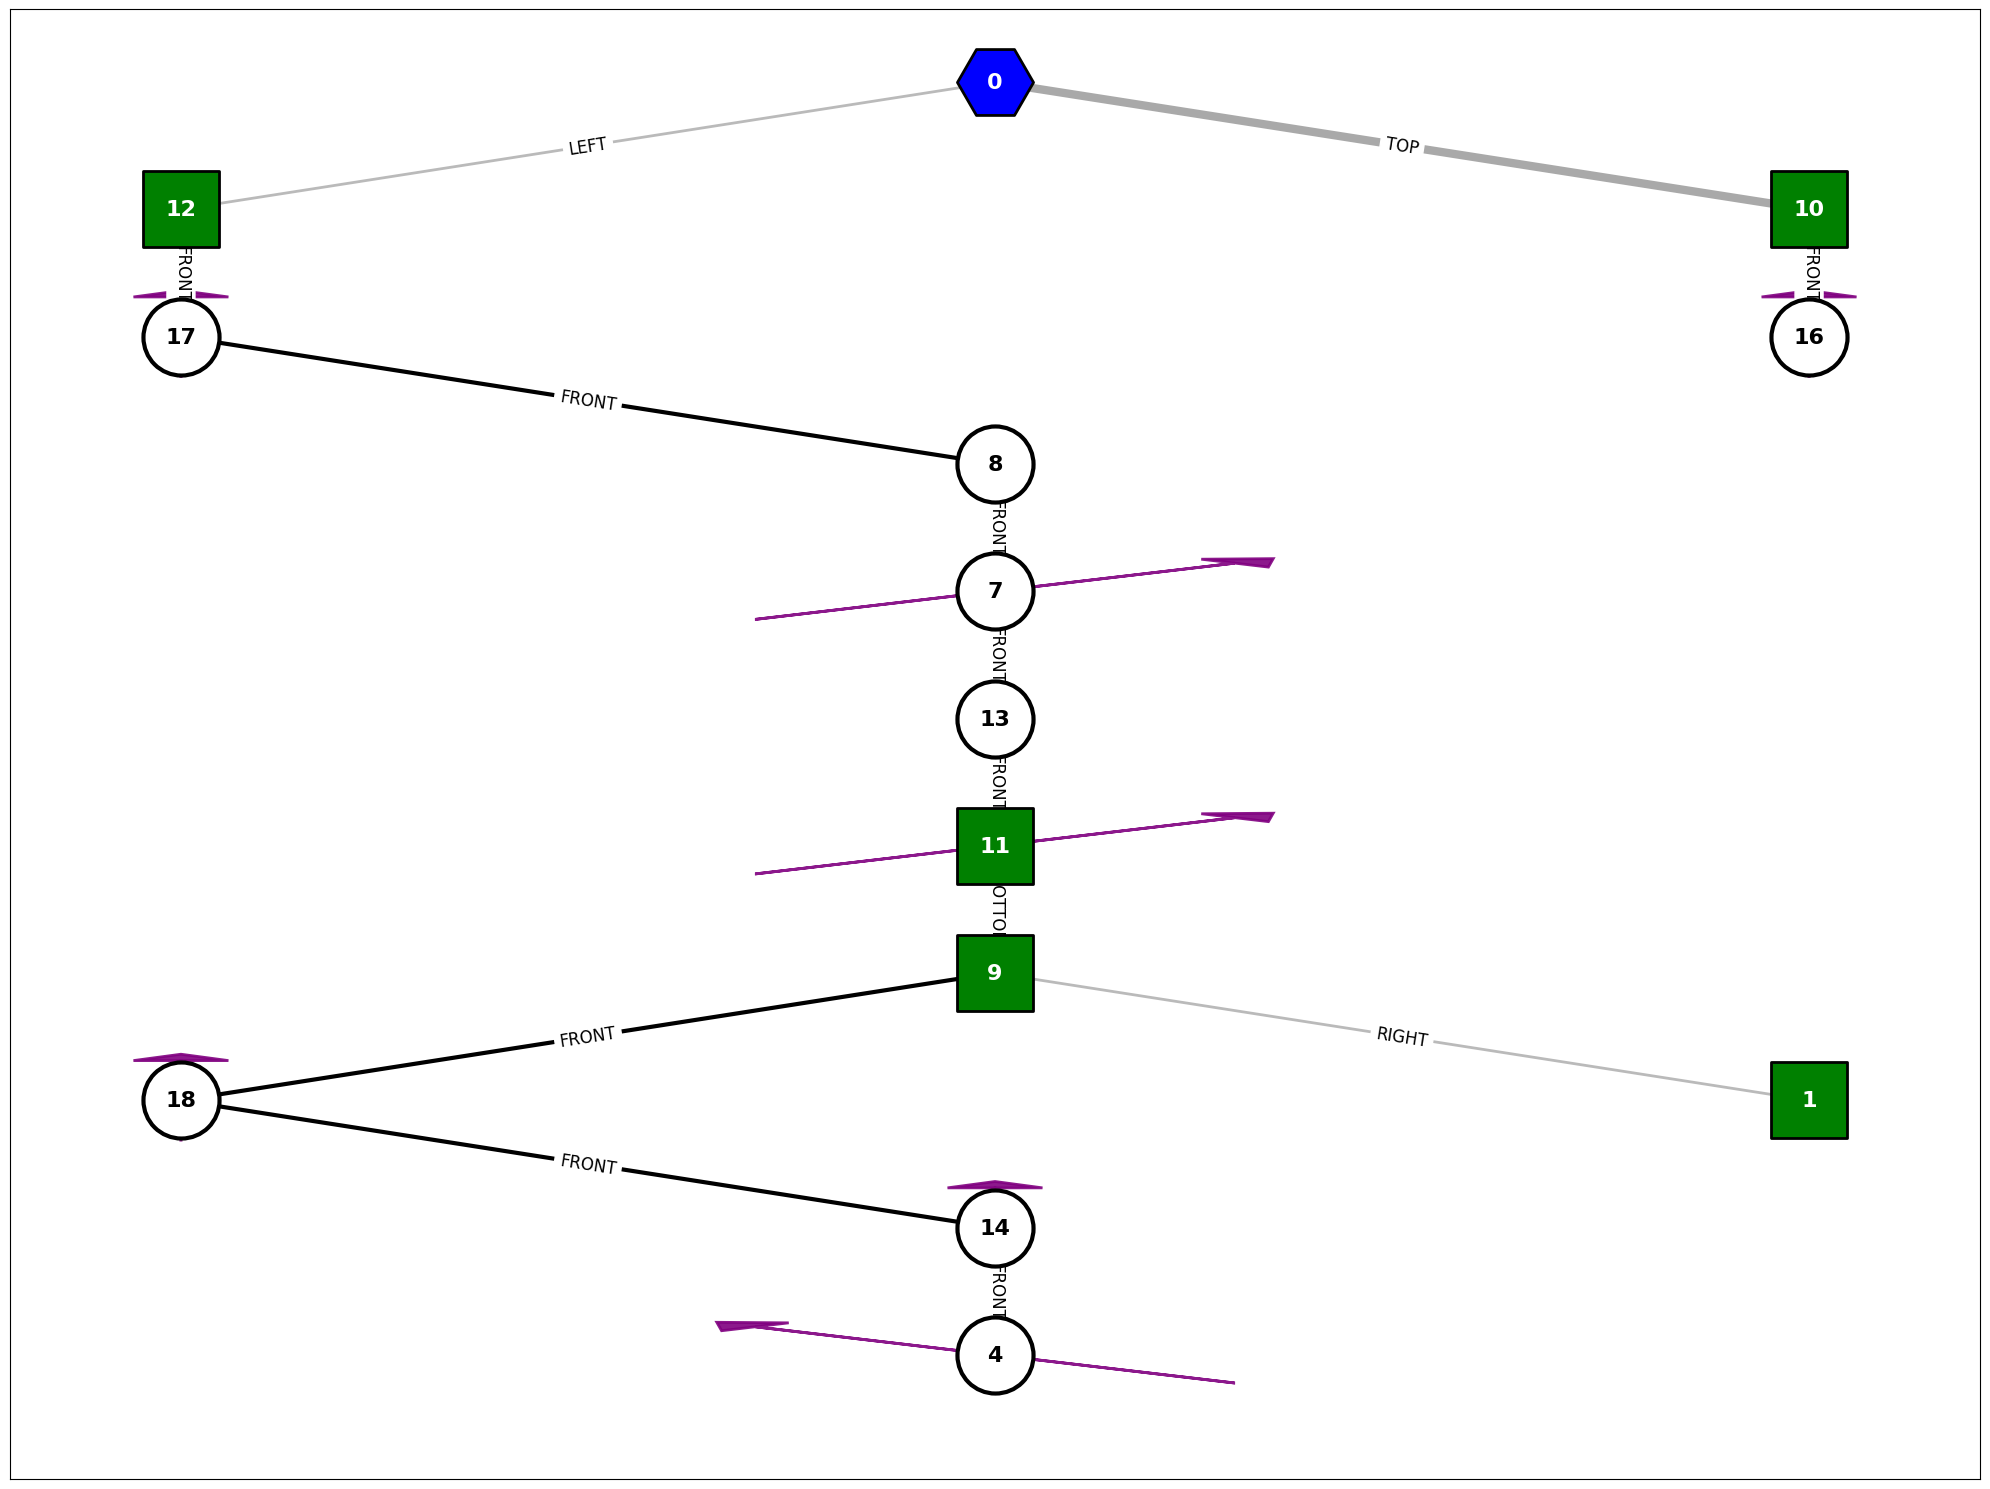

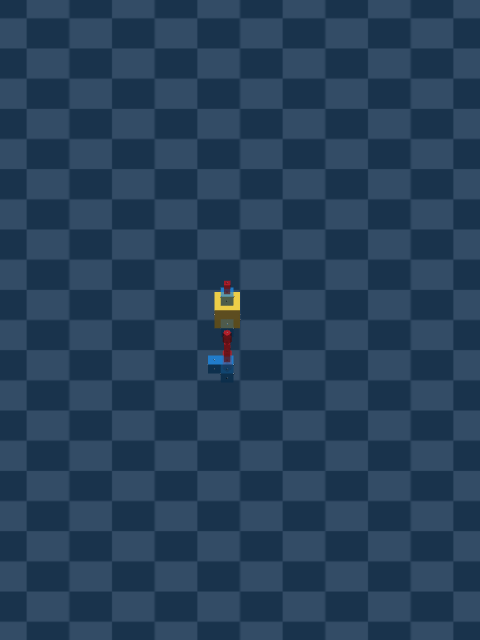

In [7]:
canon_tree = ctk.canonicalize(tree, child_order=auto_adjust_children)

visualize_tree_from_graph(ctk.to_graph(canon_tree))

view(ctk.to_graph(canon_tree))

get the robots string

In [8]:
robot_string = ctk.to_string(tree)

print(robot_string)

C[f(B2HHH5H4B3[r(B2[r(B4)]H2H6H7)])]<t(B6H2)>


or the canonical string

In [9]:
robot_canonical_string = ctk.to_canonical_string(canon_tree)

# NOTE: the canonicalstring is usually 'smaller' and more 'readible' due to angle reduction
# read the grammar in the docs/GRAMMAR.enbf
print(robot_string)

C[f(B2HHH5H4B3[r(B2[r(B4)]H2H6H7)])]<t(B6H2)>


create your own tree

In [10]:
my_custom_robot = ctk.create_root() # automatically starts with core, and will auto increment ids

attach children using dictionary acces

In [11]:
my_custom_robot['top'] = ctk.create_brick(rotation=3)

# NOTE: may use chaining for acces, or use the ctk.brick property to add a plain brick
my_custom_robot['top']['right'] = ctk.brick
my_custom_robot['front'] = ctk.hinge

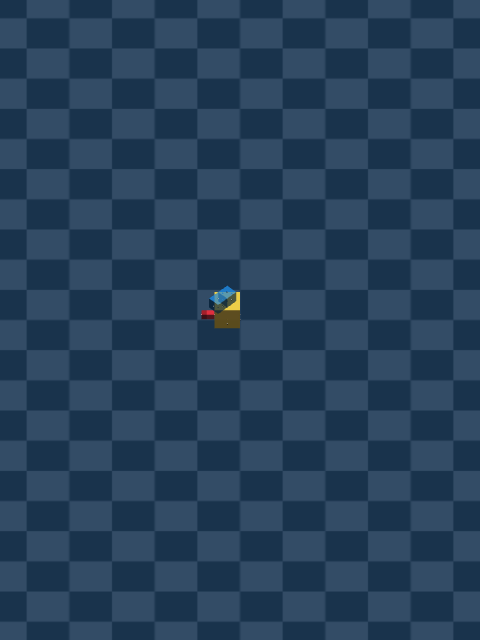

In [12]:
view(ctk.to_graph(my_custom_robot))

you may also create a limb 'first', and attach it later

In [13]:
leg = ctk.brick

brick2 = ctk.brick
brick3 = ctk.brick

leg['front'] = brick2
brick2['front'] = brick3

knee = 'brick'
knee = 'hinge'

knee = ctk.create_node(knee, 1)

# NOTE order matters here!
knee['front'] = brick2
brick3['right'] = knee

In [14]:
my_custom_robot['front'] = leg
my_custom_robot['back'] = leg

C[fb(BBB[r(H1BB)])]<t(B3[r(B)])>
C[rl(BBB[r(H1BB)])]<t(B1[l(B)])>


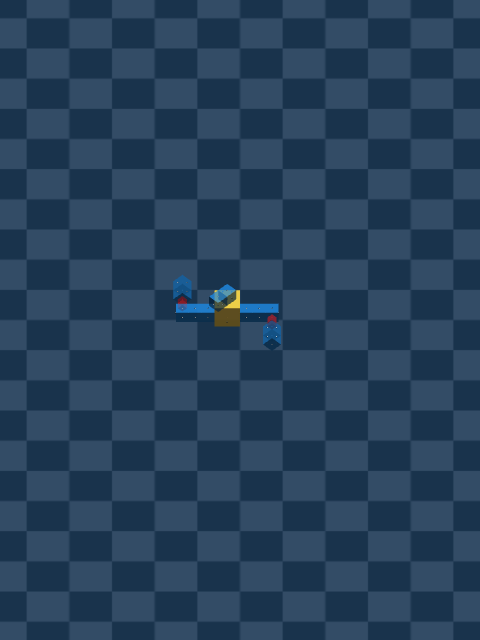

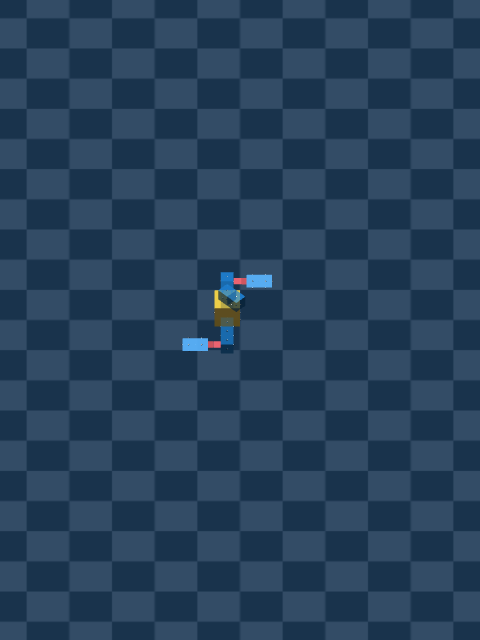

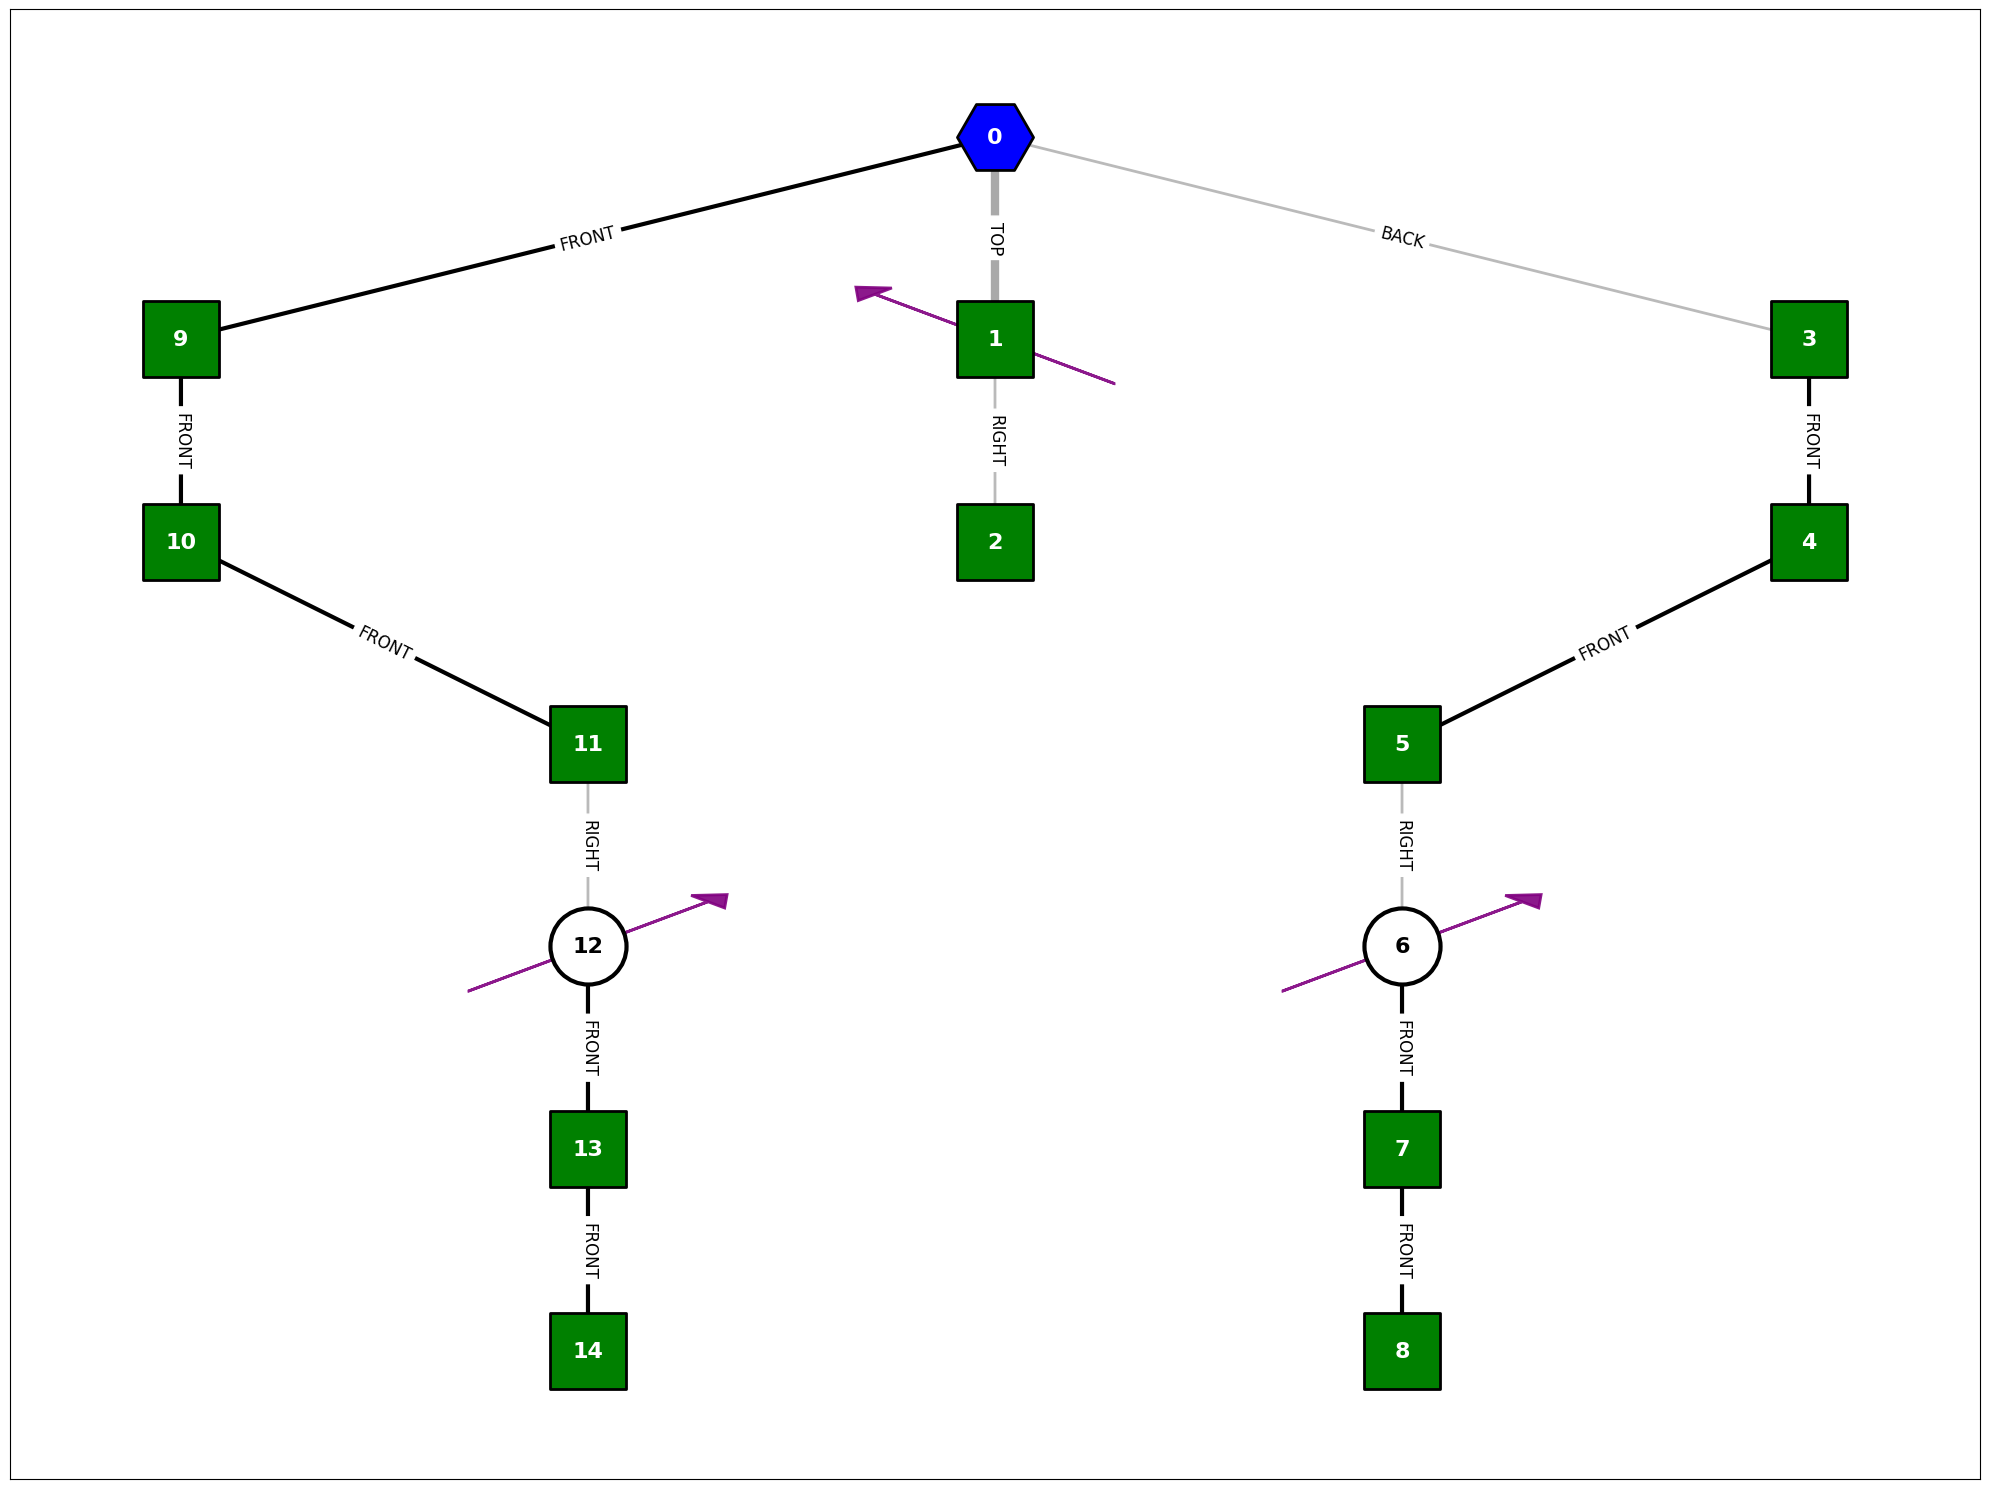

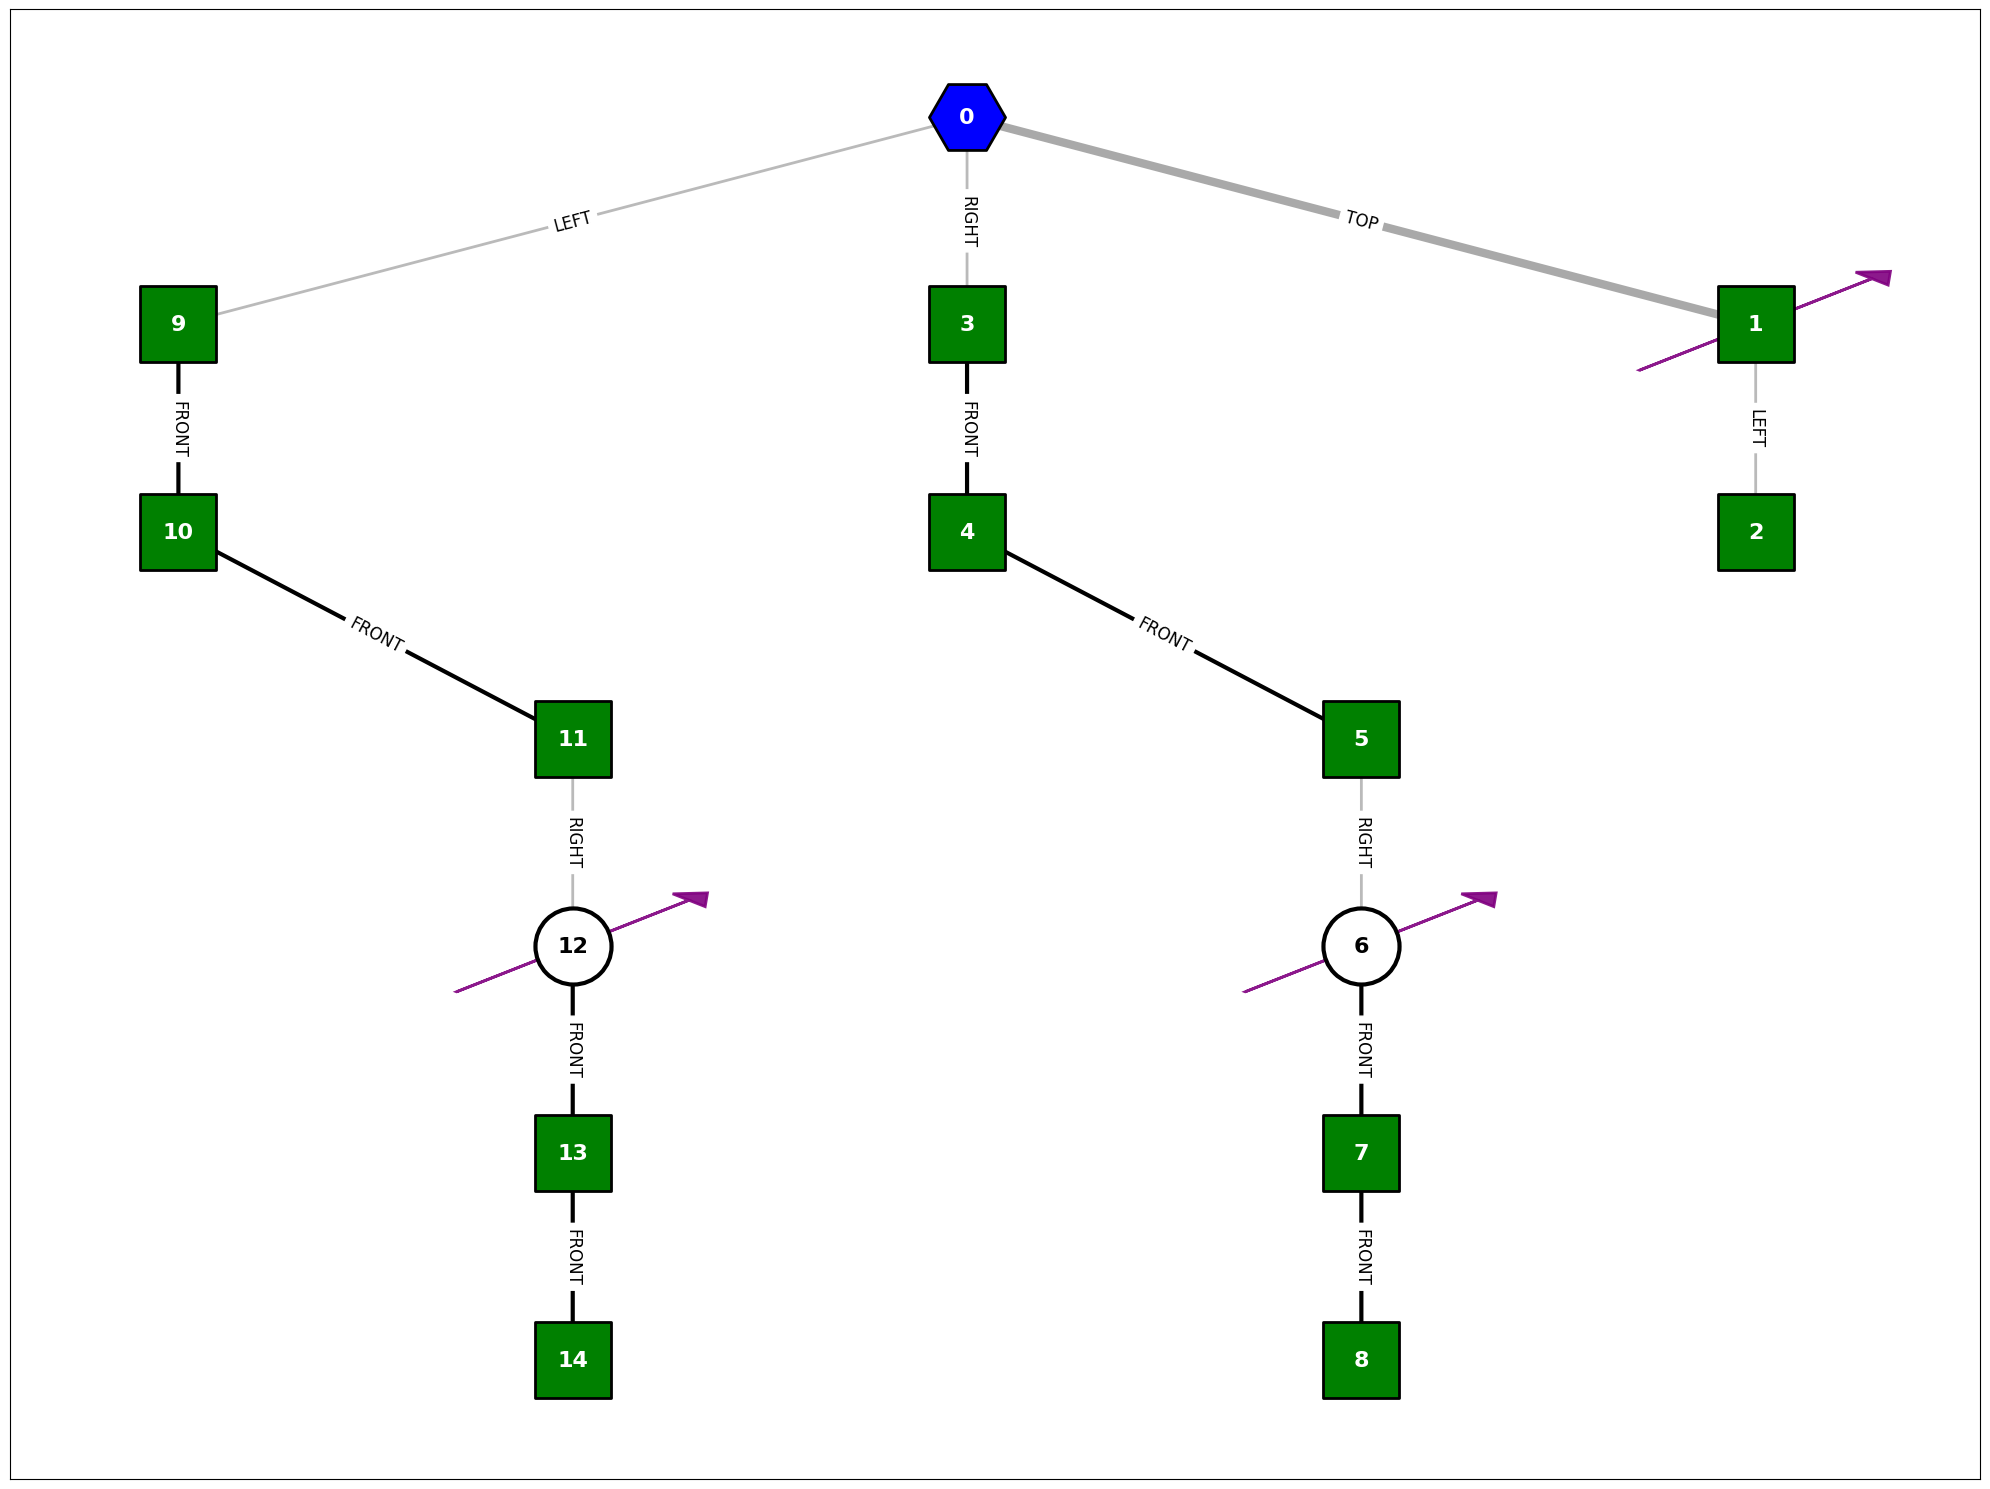

In [15]:
# raw and canonicalized
print(ctk.to_string(my_custom_robot))
print(ctk.to_canonical_string(my_custom_robot))

# raw and canonicalized
view(ctk.to_graph(my_custom_robot))
view(ctk.to_canonical_graph(my_custom_robot))

# raw and canonicalized
visualize_tree_from_graph(ctk.to_graph(my_custom_robot))
visualize_tree_from_graph(ctk.to_canonical_graph(my_custom_robot))

##### Individual Analysis

analyze the tree by obtaining all sub-trees

note that each sub-tree is also its own unique string!

In [16]:
#  (canonicalized default)

subgraph_list = ctk.collect_subtrees(my_custom_robot, ctk.OutputType.STRING)
console.print(subgraph_list)

[
    'C[rl(BBB[r(H1BB)])]<t(B1[l(B)])>',
    'B[l(B)]',
    'B',
    'BBB[r(H1BB)]',
    'BB[r(H1BB)]',
    'B[l(H1BB)]',
    'HBB',
    'BB',
    'B',
    'BBB[r(H1BB)]',
    'BB[r(H1BB)]',
    'B[l(H1BB)]',
    'HBB',
    'BB',
    'B'
]


In [17]:
analyze_amt = 3

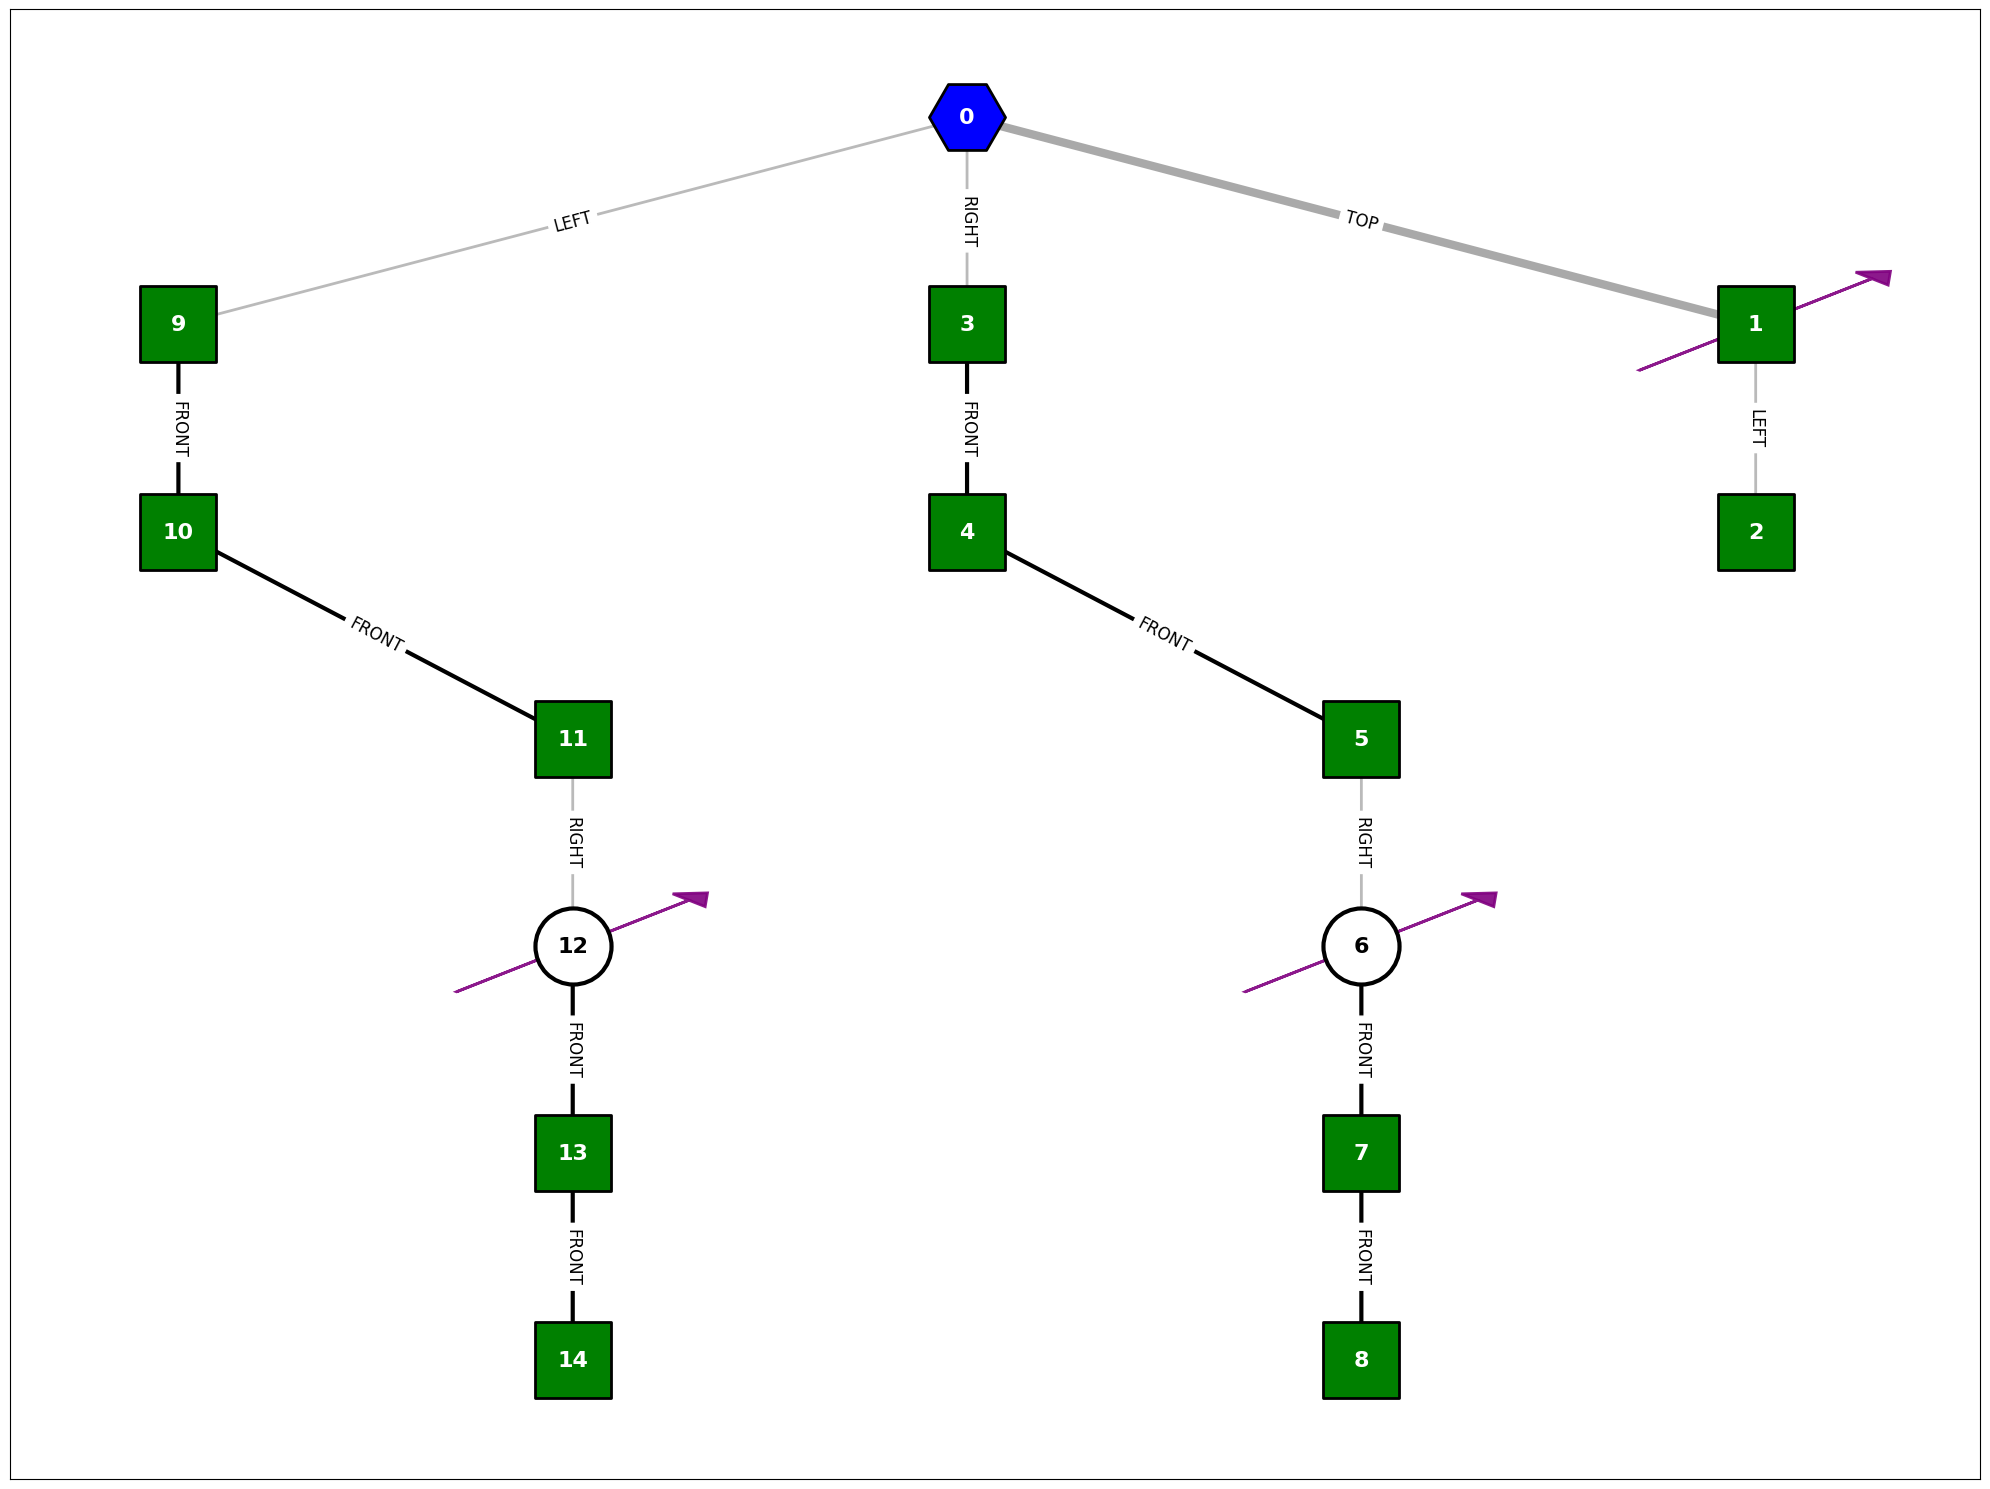

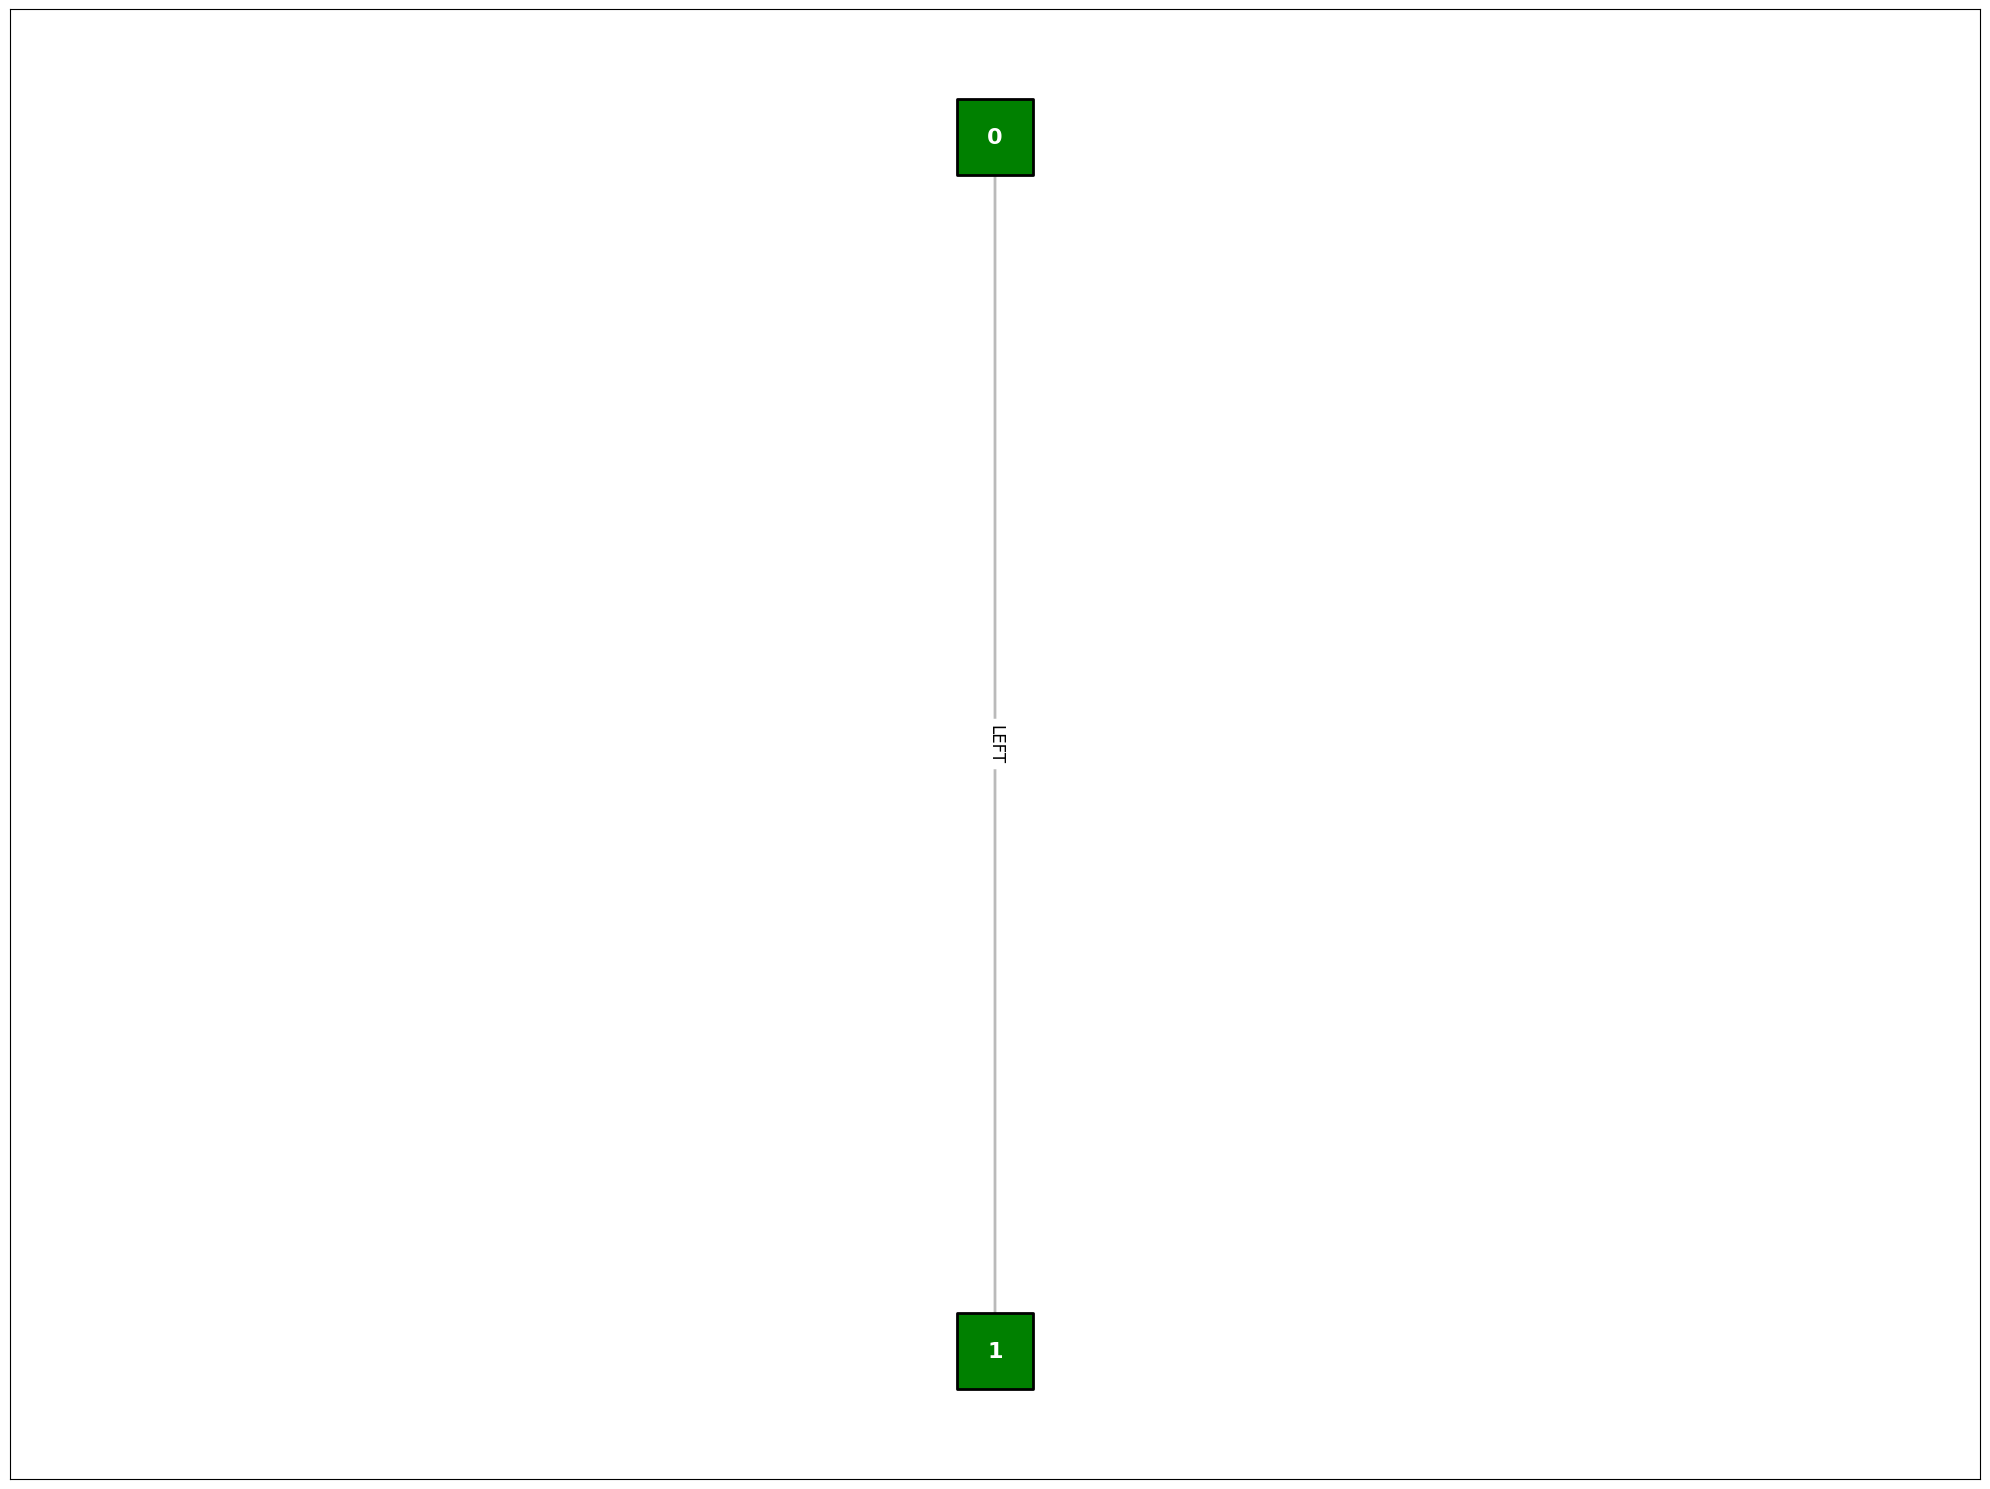

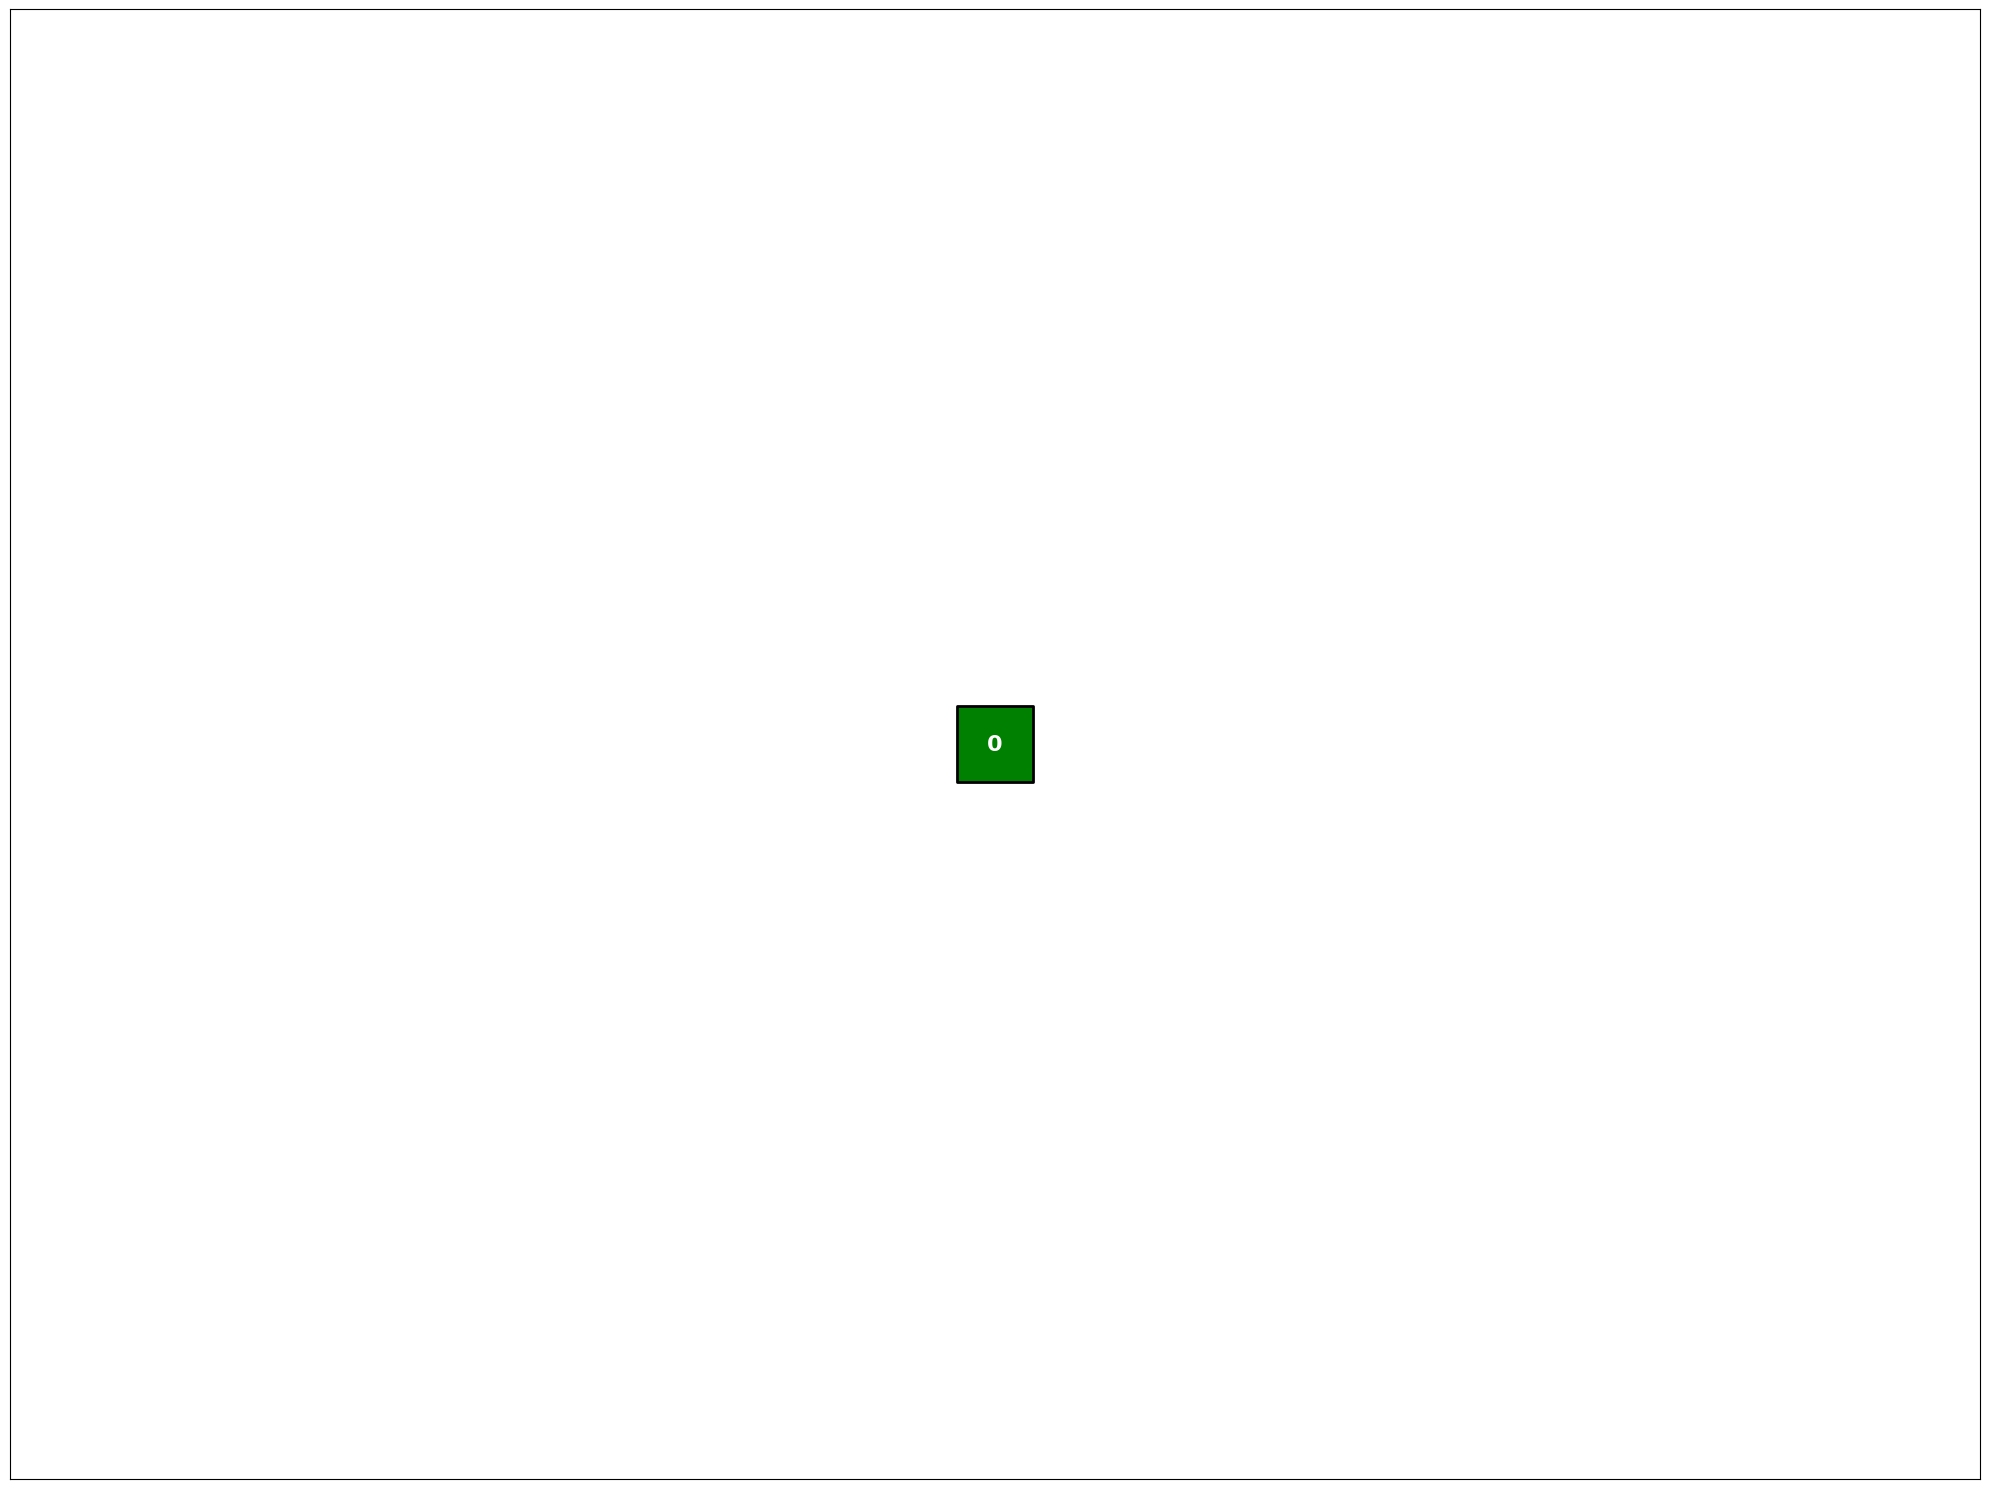

In [18]:
for i in range(analyze_amt):
    visualize_tree_from_graph(ctk.to_graph(ctk.from_string(subgraph_list[i])))
    

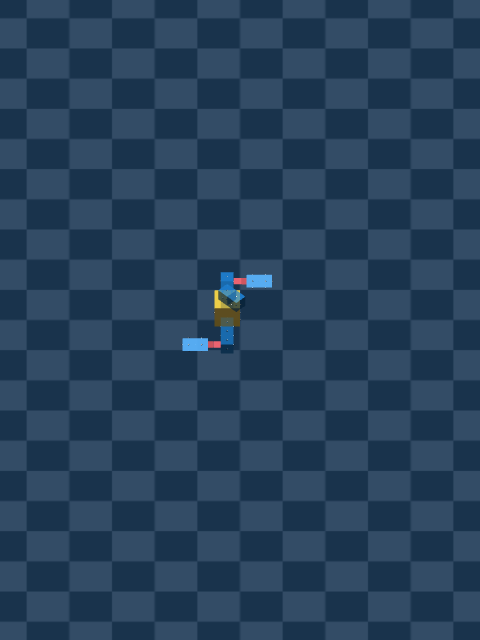

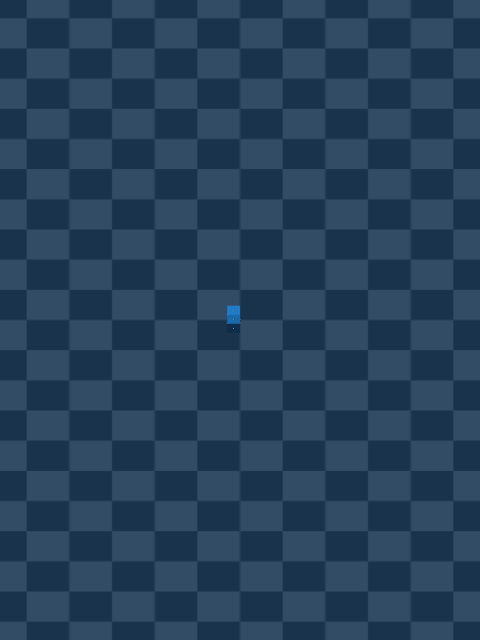

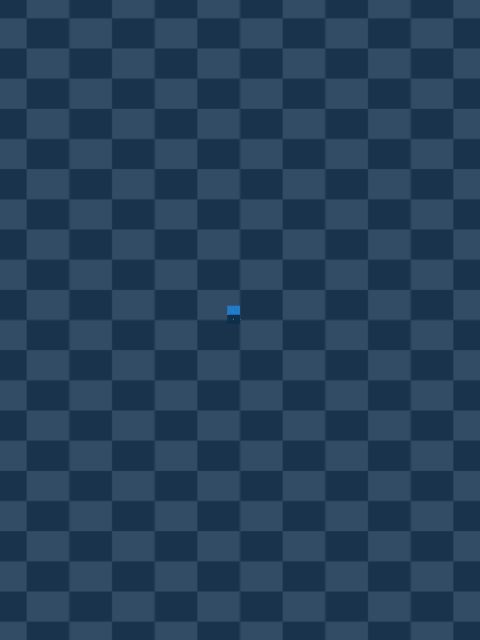

In [19]:
for i in range(analyze_amt):
    view(ctk.to_graph(ctk.from_string(subgraph_list[i])))
    

... or collect the neighbourhood environments up to a certain radius!

In [20]:
neighbourhood_dicts = ctk.collect_neighbours(my_custom_robot, use_node_max_radius=True)
console.print(neighbourhood_dicts)

{
    0: ['C', 'B', 'B', 'B', 'B', 'B', 'H', 'B', 'B', 'B', 'B', 'B', 'H', 'B', 'B'],
    1: [
        'C[rl(B)]<t(B1)>',
        'C<t(B1[l(B)])>',
        'B[l(B)]',
        'C[r(BB)]',
        'BBB',
        'BB[r(H1)]',
        'B[l(H1B)]',
        'HBB',
        'BB',
        'C[r(BB)]',
        'BBB',
        'BB[r(H1)]',
        'B[l(H1B)]',
        'HBB',
        'BB'
    ],
    2: [
        'C[rl(BB)]<t(B1[l(B)])>',
        'C[rl(B)]<t(B1[l(B)])>',
        'C<t(B1[l(B)])>',
        'C[l(B)r(BBB)]<t(B1)>',
        'C[r(BBB[r(H1)])]',
        'BBB[r(H1B)]',
        'BB[r(H1BB)]',
        'B[l(H1BB)]',
        'HBB',
        'C[l(B)r(BBB)]<t(B1)>',
        'C[r(BBB[r(H1)])]',
        'BBB[r(H1B)]',
        'BB[r(H1BB)]',
        'B[l(H1BB)]',
        'HBB'
    ],
    3: [
        'C[rl(BBB)]<t(B1[l(B)])>',
        'C[rl(BB)]<t(B1[l(B)])>',
        'C[rl(B)]<t(B1[l(B)])>',
        'C[l(BB)r(BBB[r(H1)])]<t(B1[r(B)])>',
        'C[l(B)r(BBB[r(H1B)])]<t(B1)>',
        'C[r(BBB[r(H1BB)

##### Gecko

creating the gecko!!!

In [21]:
# Create the core (automatically created as shown in your example)
gecko = ctk.create_root()  # This is the core

# Create all the modules first
neck = ctk.hinge
abdomen = ctk.brick
spine = ctk.hinge
butt = ctk.brick

# Front legs with double hinges
fl_leg = ctk.create_hinge(rotation=2)
fl_leg2 = ctk.create_hinge(rotation=2)
fl_flipper = ctk.brick

fr_leg = ctk.create_hinge(rotation=6)
fr_leg2 = ctk.create_hinge(rotation=2)
fr_flipper = ctk.brick

# Back legs with 45-degree rotation
bl_leg = ctk.create_hinge(rotation=1)
bl_flipper = ctk.brick

br_leg = ctk.create_hinge(rotation=7)
br_flipper = ctk.brick

# Build the spine chain: core -> neck -> abdomen -> spine -> butt
gecko['front'] = neck
neck['front'] = abdomen
abdomen['front'] = spine
spine['front'] = butt

# Attach front left leg chain to core
gecko['left'] = fl_leg
fl_leg['front'] = fl_leg2
fl_leg2['front'] = fl_flipper

# Attach front right leg chain to core
gecko['right'] = fr_leg
fr_leg['front'] = fr_leg2
fr_leg2['front'] = fr_flipper

# Attach back left leg to butt
butt['left'] = bl_leg
bl_leg['front'] = bl_flipper

# Attach back right leg to butt
butt['right'] = br_leg
br_leg['front'] = br_flipper

C[l(H2H2B)r(H6H2B)f(HBHB[l(H1B)r(H7B)])]
C[fb(H2H2B)l(HBHB[l(H1B)r(H3B)])]


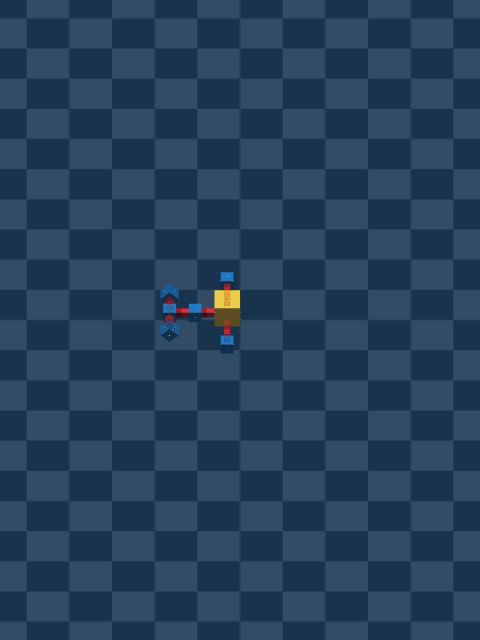

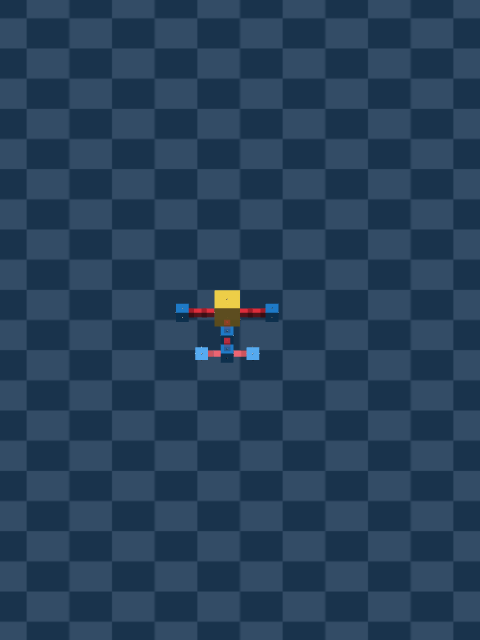

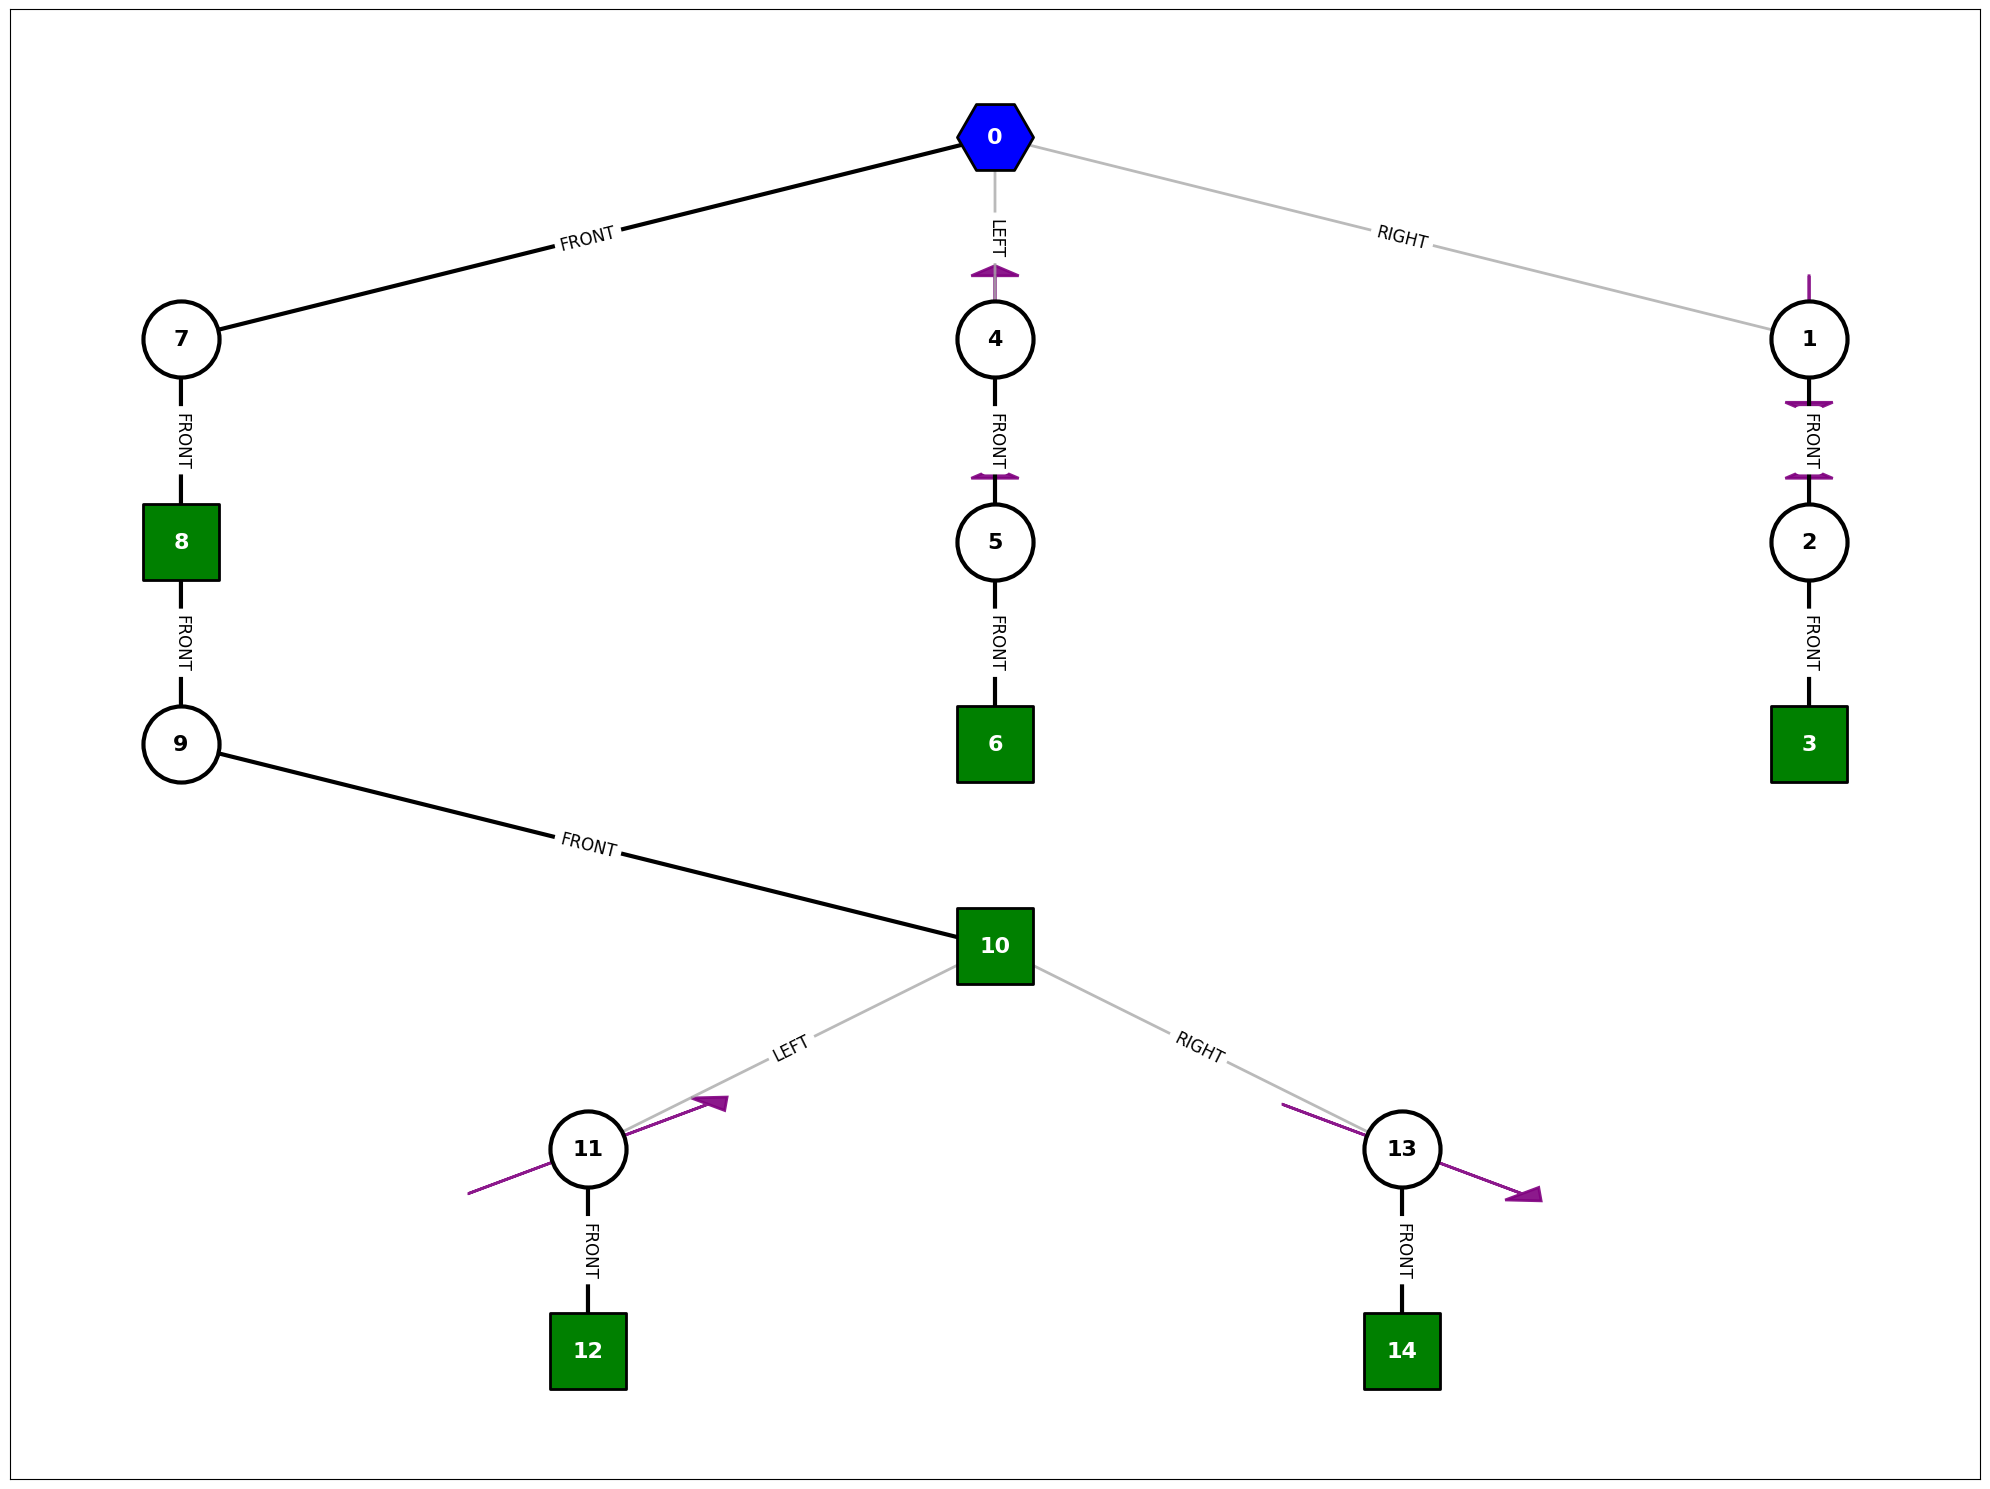

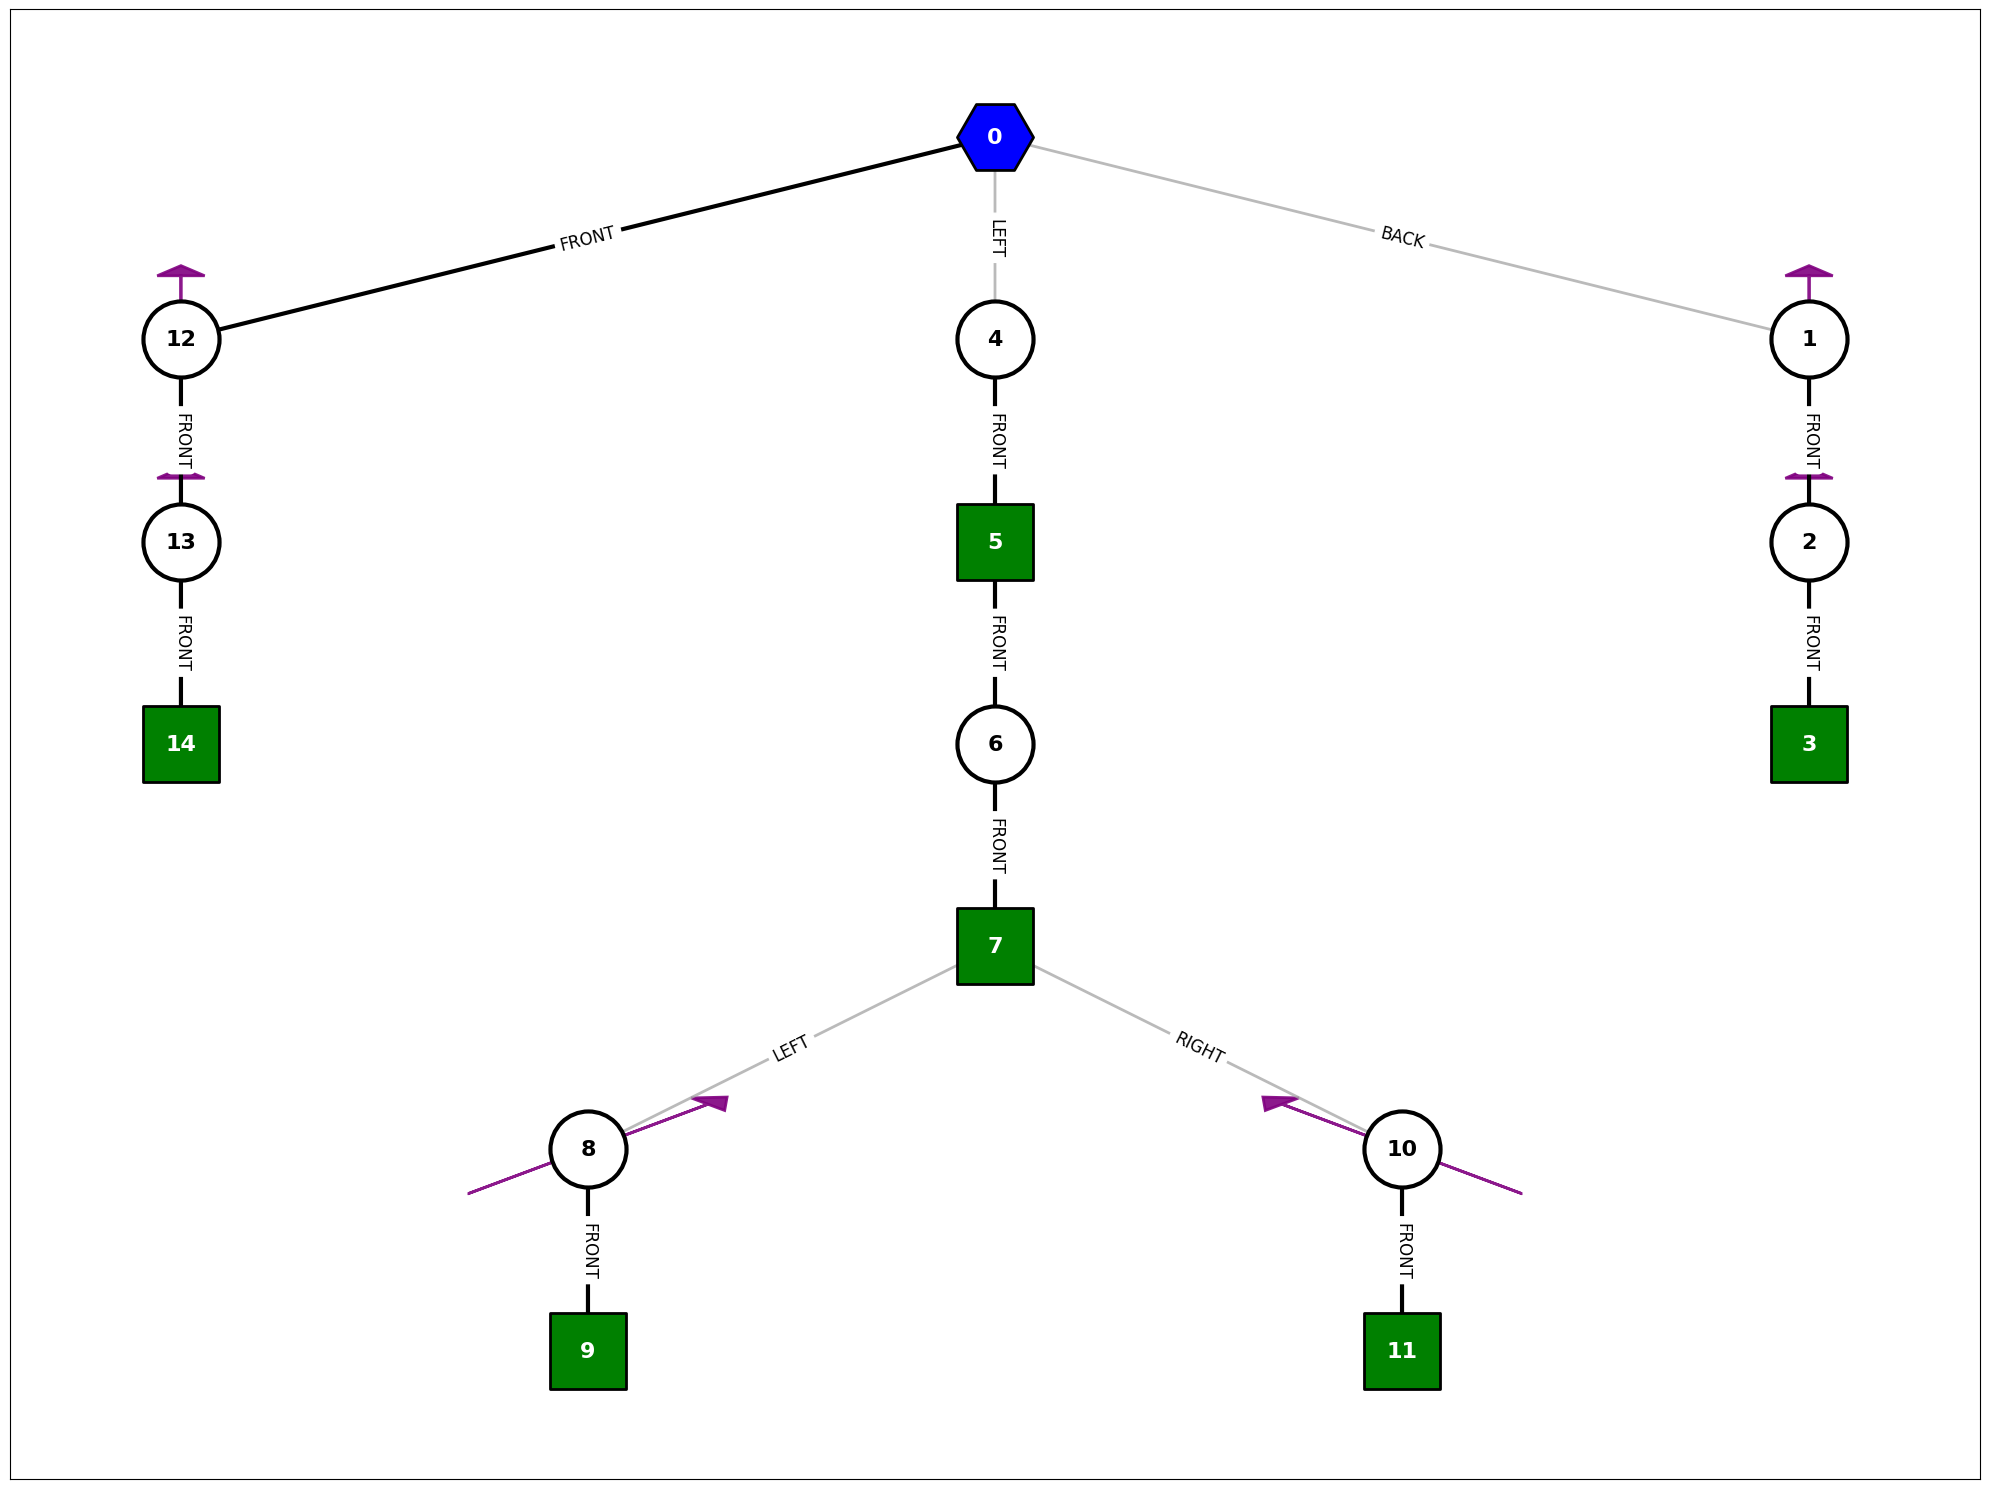

In [22]:
# raw and canonicalized
print(ctk.to_string(gecko))
print(ctk.to_canonical_string(gecko))

# raw and canonicalized
view(ctk.to_graph(gecko))
view(ctk.to_canonical_graph(gecko))

# raw and canonicalized
visualize_tree_from_graph(ctk.to_graph(gecko))
visualize_tree_from_graph(ctk.to_canonical_graph(gecko))

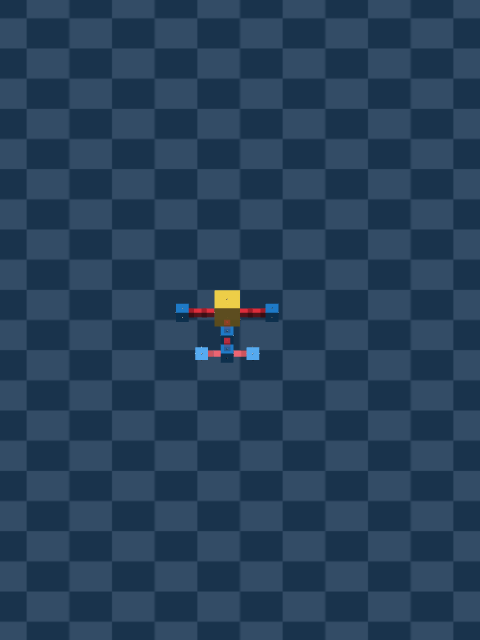

In [23]:
canonical_gecko = "C[fb(H2H2B)l(HBHB[l(H1B)r(H3B)])]"

gecko2 = ctk.from_string(canonical_gecko)
view(ctk.to_graph(gecko2))

---

##### Similarity

how similar is the gecko to my_custom_robot?

default config:

In [24]:
ctk.calculate_similarity(gecko, my_custom_robot)
ctk.calculate_similarity(my_custom_robot, gecko)

0.009

In [ ]:
radius_strategy = ctk.RadiusStrategy.NODE_LOCAL # Or Global
max_tree_radius = None

missing_data_mode = ctk.MissingDataMode.SKIP_RADIUS # TreatAsZero
tanimoto_mode = ctk.TanimotoMode.COUNTS # Set
weighting_mode = ctk.WeightingMode.LINEAR # Exponential, Softmax, Uniform

softmax_beta = 1
power_mean_p = 1 # <---- seems to be the most interesting?

similarity_config = ctk.create_similarity_config(
    radius_strategy=radius_strategy,
    max_tree_radius=max_tree_radius,
    missing_data_mode=missing_data_mode,
    tanimoto_mode=tanimoto_mode,
    softmax_beta=softmax_beta,
    power_mean_p=power_mean_p
)

In [34]:
ctk.calculate_similarity(gecko, my_custom_robot, similarity_config)

0.009